# Merge input

In [ ]:
# Definimos la ruta del archivo original y la ruta del archivo de salida
input_paths = ['hungarian.data','switzerland.data','long-beach-va.data']
output_paths = ['hungarian2.data','switzerland2.data','long-beach-va2.data']

cnt = 0

for inp,out in zip(input_paths, output_paths):
    # Leemos el archivo original especificando el encoding
    with open(inp, 'r') as file:
        lines = file.readlines()

    # Procesamos el archivo
    flat_list = []
    for line in lines:
    # Aquí asumimos que cada 'palabra' en la línea es un valor y que están separados por espacios.
        values = line.split()
        for v in values:
            flat_list.append(v)

    with open(out, 'w') as file:
        for i in range(0, len(flat_list), 76):
            line = flat_list[i:i+76]
            line[0] = str(cnt)
            file.write(','.join(str(el) for el in line)+ '\n')  # Añadimos un salto de línea al final de cada fila
            cnt += 1

    print("Archivo procesado y guardado como:", out)

# Leer cada archivo y almacenarlos en una lista de DataFrames
dataframes = [pd.read_csv(file, header = None) for file in output_paths]

# Concatenar todos los DataFrames en uno solo
df_combinado = pd.concat(dataframes, ignore_index=True)
df_combinado.shape
# Guardar el DataFrame combinado en un nuevo archivo CSV
df_combinado.to_csv('merge_data.data', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'hungarian.data'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###################### Preprocessing #########################
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.impute import KNNImputer


####################### Models ###########################
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


###################### Feature Reduction ########################
from sklearn.feature_selection import RFECV, SequentialFeatureSelector
from sklearn.feature_selection import RFE

###################### Metrics #######################
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, \
                  classification_report, accuracy_score,  precision_score, recall_score, f1_score, fbeta_score, make_scorer


In [ ]:
merged_file = "merge_data.data"
df = pd.read_csv(merged_file, header=None)
df.head()

0   1   2   3   4   5   6   7   8    9   ...  66  67  68  69  70  71  72  \
0   0   0  40   1   1   0   0  -9   2  140  ...  -9  -9   1   1   1   1   1   
1   1   0  49   0   1   0   0  -9   3  160  ...  -9  -9   1   1   1   1   1   
2   2   0  37   1   1   0   0  -9   2  130  ...  -9  -9   1   1   1   1   1   
3   3   0  48   0   1   1   1  -9   4  138  ...   2  -9   1   1   1   1   1   
4   4   0  54   1   1   0   1  -9   3  150  ...   1  -9   1   1   1   1   1   

    73   74    75  
0 -9.0 -9.0  name  
1 -9.0 -9.0  name  
2 -9.0 -9.0  name  
3 -9.0 -9.0  name  
4 -9.0 -9.0  name  

[5 rows x 76 columns]

# Data preprocessing

## Assignació de categories

In [ ]:
categoriques = ['3','4','5','6','8','10','12','15','16','17','18']+[str(i) for i in range(22,27)] + ['37','38','40','50'] + [str(i) for i in range(57,68)]
for c in categoriques:
    df[int(c)]=df[int(c)].astype('category')

In [ ]:
feat_names = ["id",
 "ccf",
 "age",
 "sex",
 "painloc",
 "painexer",
 "relrest",
 "pncaden",
 "cp",
 "trestbps",
 "htn",
 "chol",
 "smoke",
 "cigs",
 "years",
 "fbs",
 "dm",
 "famhist",
 "restecg",
 "ekgmo",
 "ekgday",
 "ekgyr",
 "dig",
 "prop",
 "nitr",
 "pro",
 "diuretic",
 "proto",
 "thaldur",
 "thaltime",
 "met",
 "thalach",
 "thalrest",
 "tpeakbps",
 "tpeakbpd",
 "dummy",
 "trestbpd",
 "exang",
 "xhypo",
 "oldpeak",
 "slope",
 "rldv5",
 "rldv5e",
 "ca",
 "restckm",
 "exerckm",
 "restef",
 "restwm",
 "exeref",
 "exerwm",
 "thal",
 "thalsev",
 "thalpul",
 "earlobe",
 "cmo",
 "cday",
 "cyr",
 "num",
 "lmt",
 "ladprox",
 "laddist",
 "diag",
 "cxmain",
 "ramus",
 "om1",
 "om2",
 "rcaprox",
 "rcadist",
 "lvx1",
 "lvx2",
 "lvx3",
 "lvx4",
 "lvf",
 "cathef",
 "junk",
 "name"
]

dict_names = {i: feat_names[i] for i in range(len(feat_names))}

In [ ]:
df.rename(columns=dict_names, inplace=True)
df.columns

Index(['id', 'ccf', 'age', 'sex', 'painloc', 'painexer', 'relrest', 'pncaden',
       'cp', 'trestbps', 'htn', 'chol', 'smoke', 'cigs', 'years', 'fbs', 'dm',
       'famhist', 'restecg', 'ekgmo', 'ekgday', 'ekgyr', 'dig', 'prop', 'nitr',
       'pro', 'diuretic', 'proto', 'thaldur', 'thaltime', 'met', 'thalach',
       'thalrest', 'tpeakbps', 'tpeakbpd', 'dummy', 'trestbpd', 'exang',
       'xhypo', 'oldpeak', 'slope', 'rldv5', 'rldv5e', 'ca', 'restckm',
       'exerckm', 'restef', 'restwm', 'exeref', 'exerwm', 'thal', 'thalsev',
       'thalpul', 'earlobe', 'cmo', 'cday', 'cyr', 'num', 'lmt', 'ladprox',
       'laddist', 'diag', 'cxmain', 'ramus', 'om1', 'om2', 'rcaprox',
       'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4', 'lvf', 'cathef', 'junk',
       'name'],
      dtype='object')

## Variables indicades com a irrellevants

In [ ]:
len(df.loc[df["pro"] == 1])

116

Eliminem les columnes indicades com a "not used", "irrelevant", dates de proves o que són l'agregació d'altres variables.

In [ ]:
print("Nombre de features abans:", len(df.columns))
useless_columns = ["id", "ccf", "dummy", "thalsev","thalpul", "earlobe", "lvx1", "lvx2", "lvx3", "lvx4", "lvf", "cathef", "junk", "xhypo", "name", "restckm", "exerckm", "proto", "cmo", "cday", "cyr", "ekgmo", "ekgday", "ekgyr"]
df.drop(useless_columns, axis = 1, inplace = True)

print("Nombre de features després:", len(df.columns))

Nombre de features abans: 76
Nombre de features després: 52


Proto és una categoria però està marcada com a float. No són consistents els valors. Convindria eliminar.

A xhypo no s'indica què representa.

- Pro és una variable que per si mateixa no hauria de ser un indicador de malaltia o no. La presència de pro vol dir que s'ha administrat una medicació que alleuja la càrrega del cor, de manera que els valors en altres proves sortiran inferiors als valors reals. Aquesta relació no la capturen la majoria de models plantejats (potser el random forest sí), i com que s'administra a malalts el model pot esbiaixar-se, de manera que pro = 1 ho indiqui com a malalt. Tot i així, quan fitegem el random forest no és de les variables més determinants. L'approach més adient seria fer feature engineering i modificar els valors relacionats amb l'electrocardiograma en cas de pro = 1. Tanmateix, ens falta informació sobre com s'haurien de modificar aquests valors.

In [ ]:
df.drop("pro", axis = 1, inplace = True)

## Missing values

Tots els -9 són missing values

In [ ]:
df.replace(-9, np.nan, inplace=True)
df.head()

age sex painloc painexer relrest  pncaden cp  trestbps htn   chol  ...  \
0   40   1       1        0       0      NaN  2     140.0   0  289.0  ...   
1   49   0       1        0       0      NaN  3     160.0   1  180.0  ...   
2   37   1       1        0       0      NaN  2     130.0   0  283.0  ...   
3   48   0       1        1       1      NaN  4     138.0   0  214.0  ...   
4   54   1       1        0       1      NaN  3     150.0   0    NaN  ...   

   lmt  ladprox  laddist diag cxmain ramus  om1  om2 rcaprox rcadist  
0  NaN      NaN      NaN  NaN    NaN   NaN  NaN  NaN     NaN     NaN  
1  NaN      NaN        2  NaN    NaN   NaN  NaN  NaN     NaN     NaN  
2  NaN      NaN      NaN  NaN    NaN   NaN  NaN  NaN     NaN     NaN  
3  NaN        2      NaN  NaN      2   NaN  NaN  NaN       2     NaN  
4  NaN      NaN      NaN  NaN      1   NaN  NaN  NaN       1     NaN  

[5 rows x 51 columns]

Explorant les dades, hem vist que alguns missing values estaven indicats amb 0 (ex: no té sentit un colesterol de 0)

In [ ]:
df["chol"].replace(0, np.nan, inplace=True)
df["slope"].replace(0, np.nan, inplace=True)
df["trestbps"].replace(0, np.nan, inplace=True)
df["trestbpd"].replace(0, np.nan, inplace=True)

Eliminem les columnes categòriques amb més de 10% de missing values o les numèriques amb més de 30% de missing values

In [ ]:
print("Nombre de features abans:", len(df.columns))
too_nan = [c for c in df.columns if df[c].isna().sum()/len(df) > 0.1 and df[c].dtype == "category" or df[c].isna().sum()/len(df) > 0.30]
df.drop(too_nan, axis = 1, inplace = True)
print("Nombre de features després:", len(df.columns))

Nombre de features abans: 51
Nombre de features després: 21


In [ ]:
len(df)

617

## Feature engineering

Com que tenim poques dades en general i encara menys per les categories 4, i 3, i tenint en compte que 0 vol dir no tenir malaltia cardiovascular i la resta son graus de malaltia cardiovascular que no s'especifiquen, nosaltres considerarem únicament 0 o 1 (absència o presència)

In [ ]:
print(df['num'].value_counts())
df['num'].replace([3,2,4], 1, inplace = True)
print(df['num'].value_counts())

num
0    247
1    141
3    100
2     99
4     30
Name: count, dtype: int64
num
1    370
0    247
Name: count, dtype: int64


42 rldv5: height at rest
43 rldv5e: height at peak exercise

El que ens interessa és la diferència. Ens crearem una nova feature que sigui la diferència entre les dues.

In [ ]:
df['diff_rldv5'] = df['rldv5e'] - df['rldv5']
df.drop("rldv5e", axis = 1, inplace = True)
len(df.columns)

## Tractament d'outliers

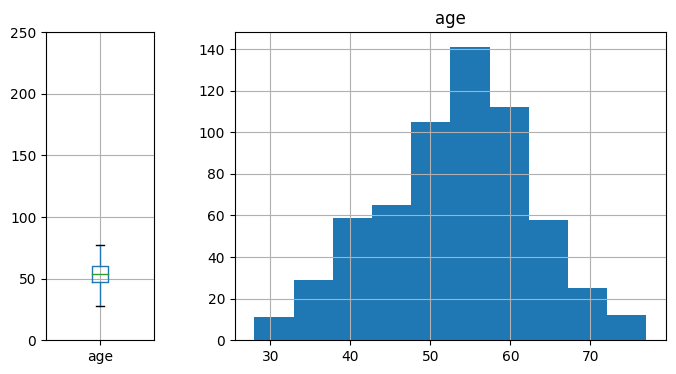

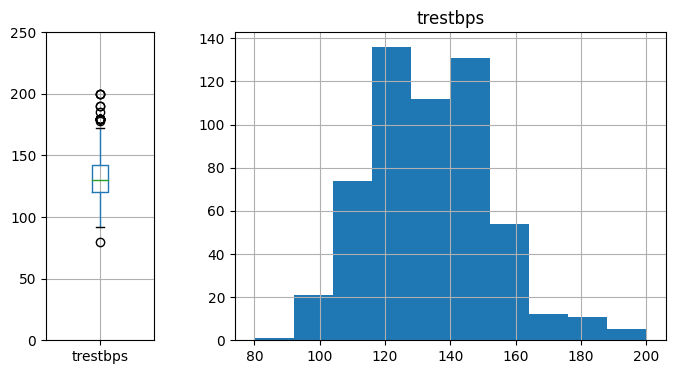

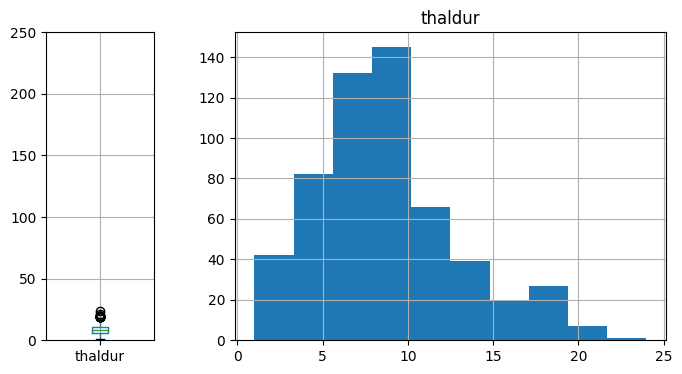

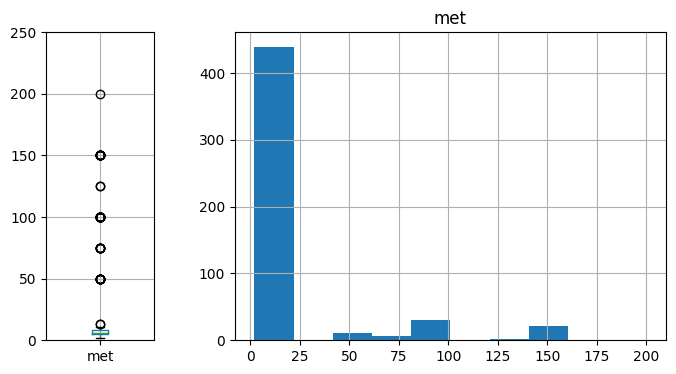

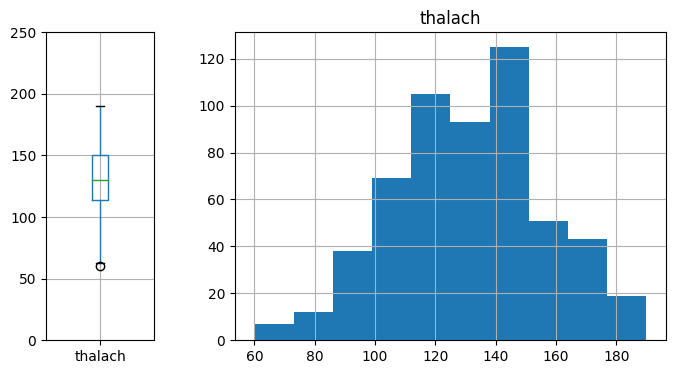

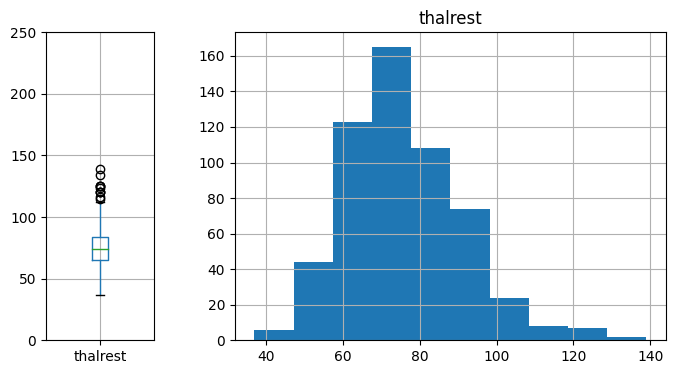

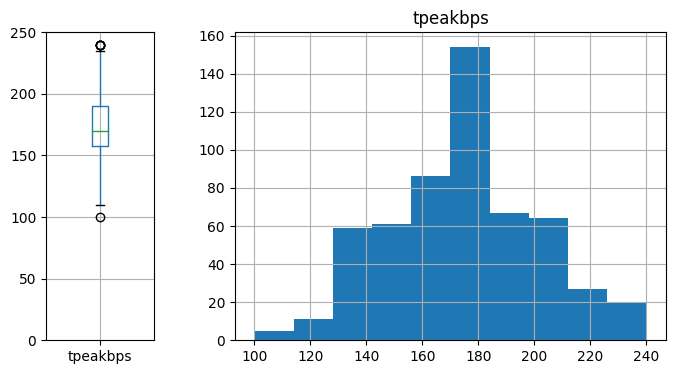

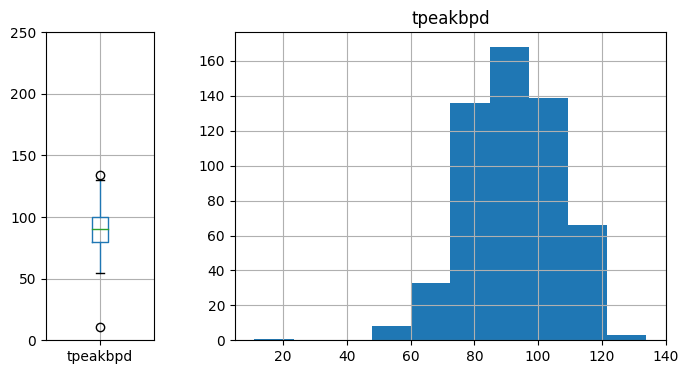

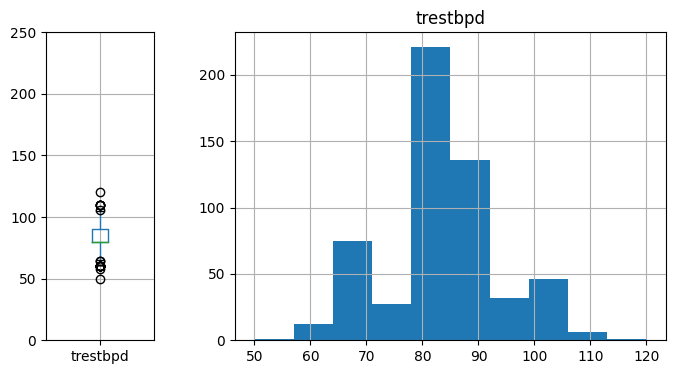

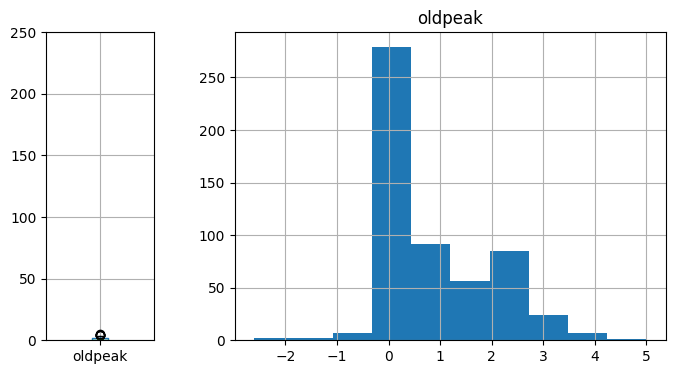

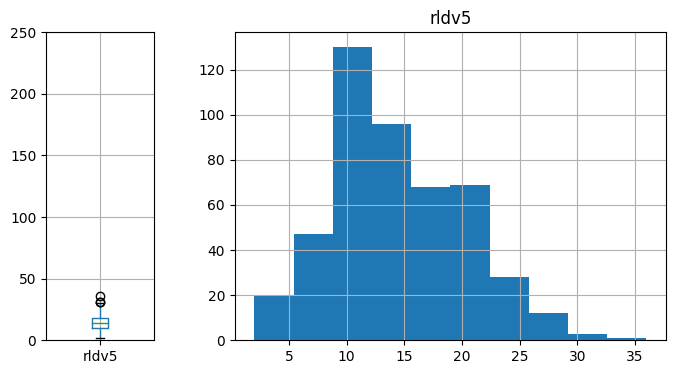

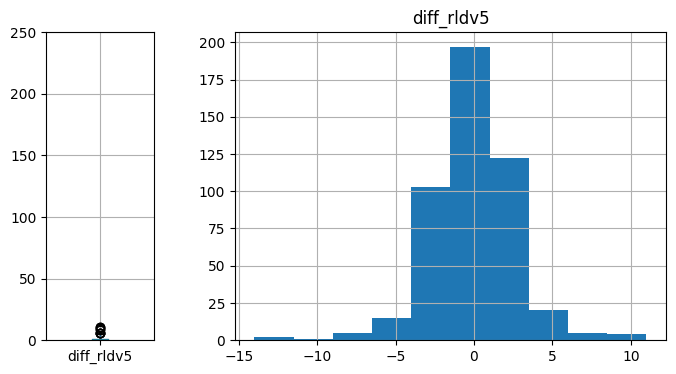

In [ ]:
for col in df.columns:
  if df[col].dtype != "category":
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(8,4))
    df.boxplot(column=col,ax=axes[0]);
    df.hist(column=col, ax=axes[1]);
    axes[0].set_ylim((0, 250))

- tpeakbddp deu tenir un error
- met té valors massa alts.


In [ ]:
print("%Outliers a met:", len(df.loc[df["met"] > 25])/len(df), "%")
print("Outliers a tpeakbpd:", len(df.loc[df["tpeakbpd"] < 20]))

%Outliers a met: 0.11831442463533225 %
Outliers a tpeakbpd: 1


Amb met és més d'un 10%, així que el posem com a NaN. En canvi, tpeakbpdd és només 1 instància, així que l'eliminem.

In [ ]:
df = df[df["tpeakbpd"] != 11]
df.loc[df["met"] > 25, "met"] = np.nan

## Anàlisi exploratòria

In [ ]:
len(df.columns)

21

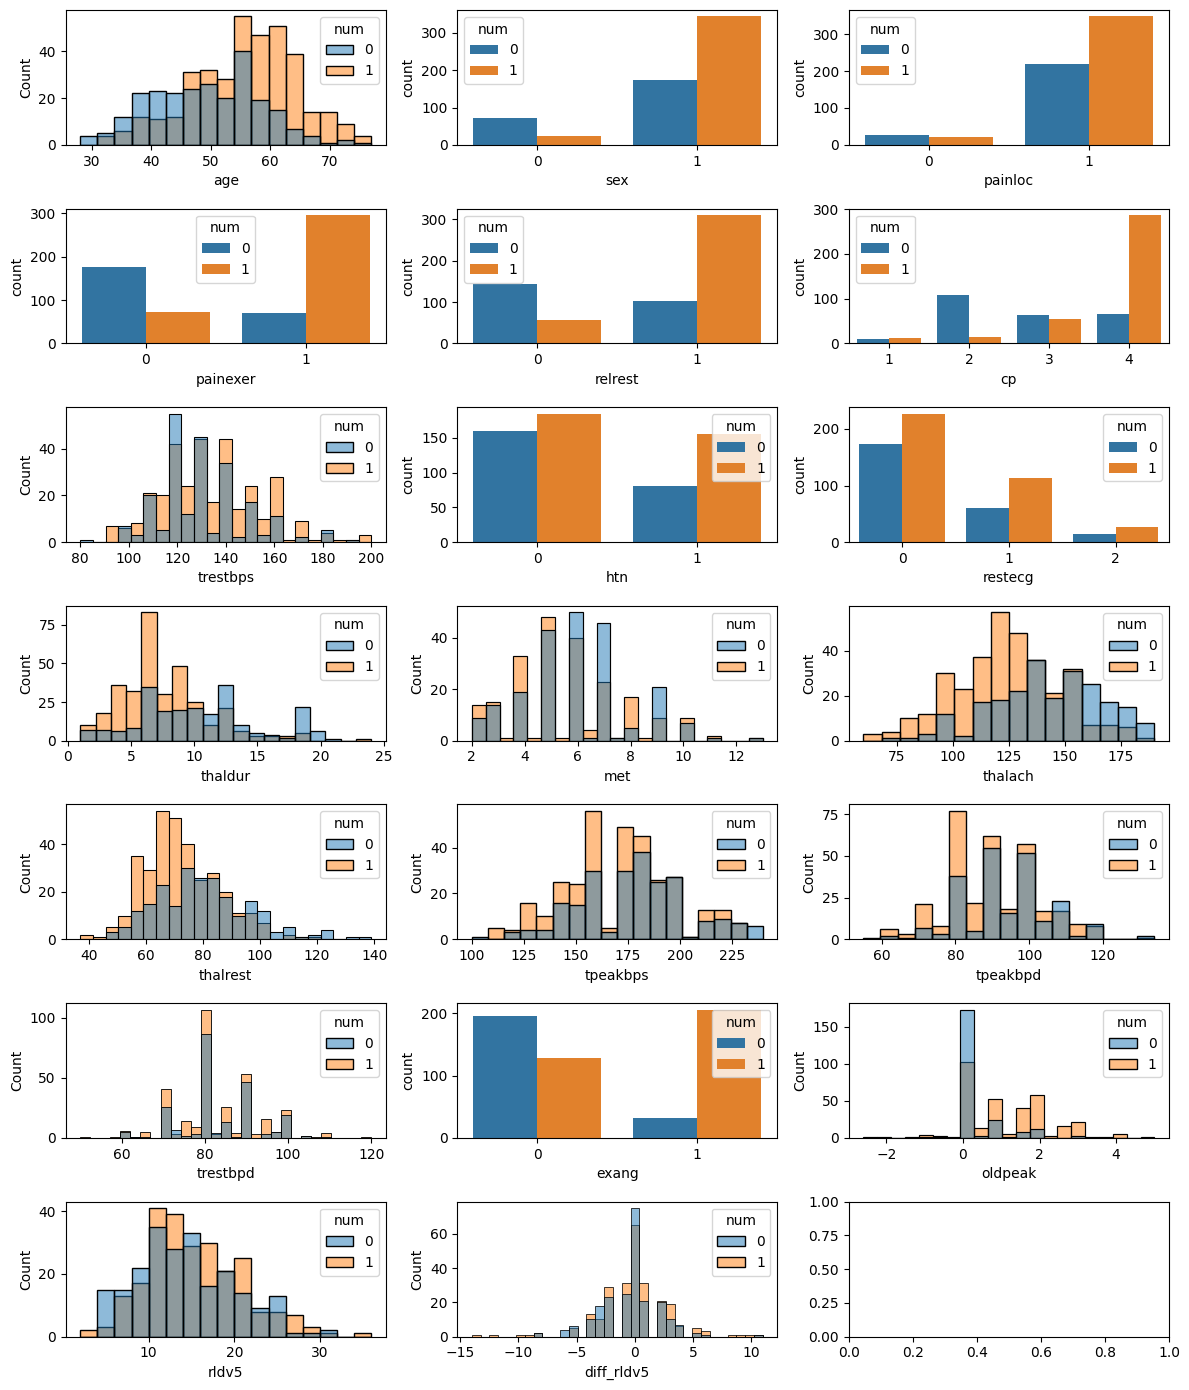

In [ ]:
fig, axes = plt.subplots(7,3,figsize=(12,14));


for i, c in enumerate([col for col in df.columns if col != "num"]):
    if c == "num":
      continue
    ax = axes.reshape(-1)[i]
    if c in df.select_dtypes(include=['category']).columns:
        a = sns.countplot(x=c,data=df, ax=ax, hue='num');
    else:
        sns.histplot(x=c,data=df, hue='num',ax=ax);
plt.tight_layout();

## Variables correlades

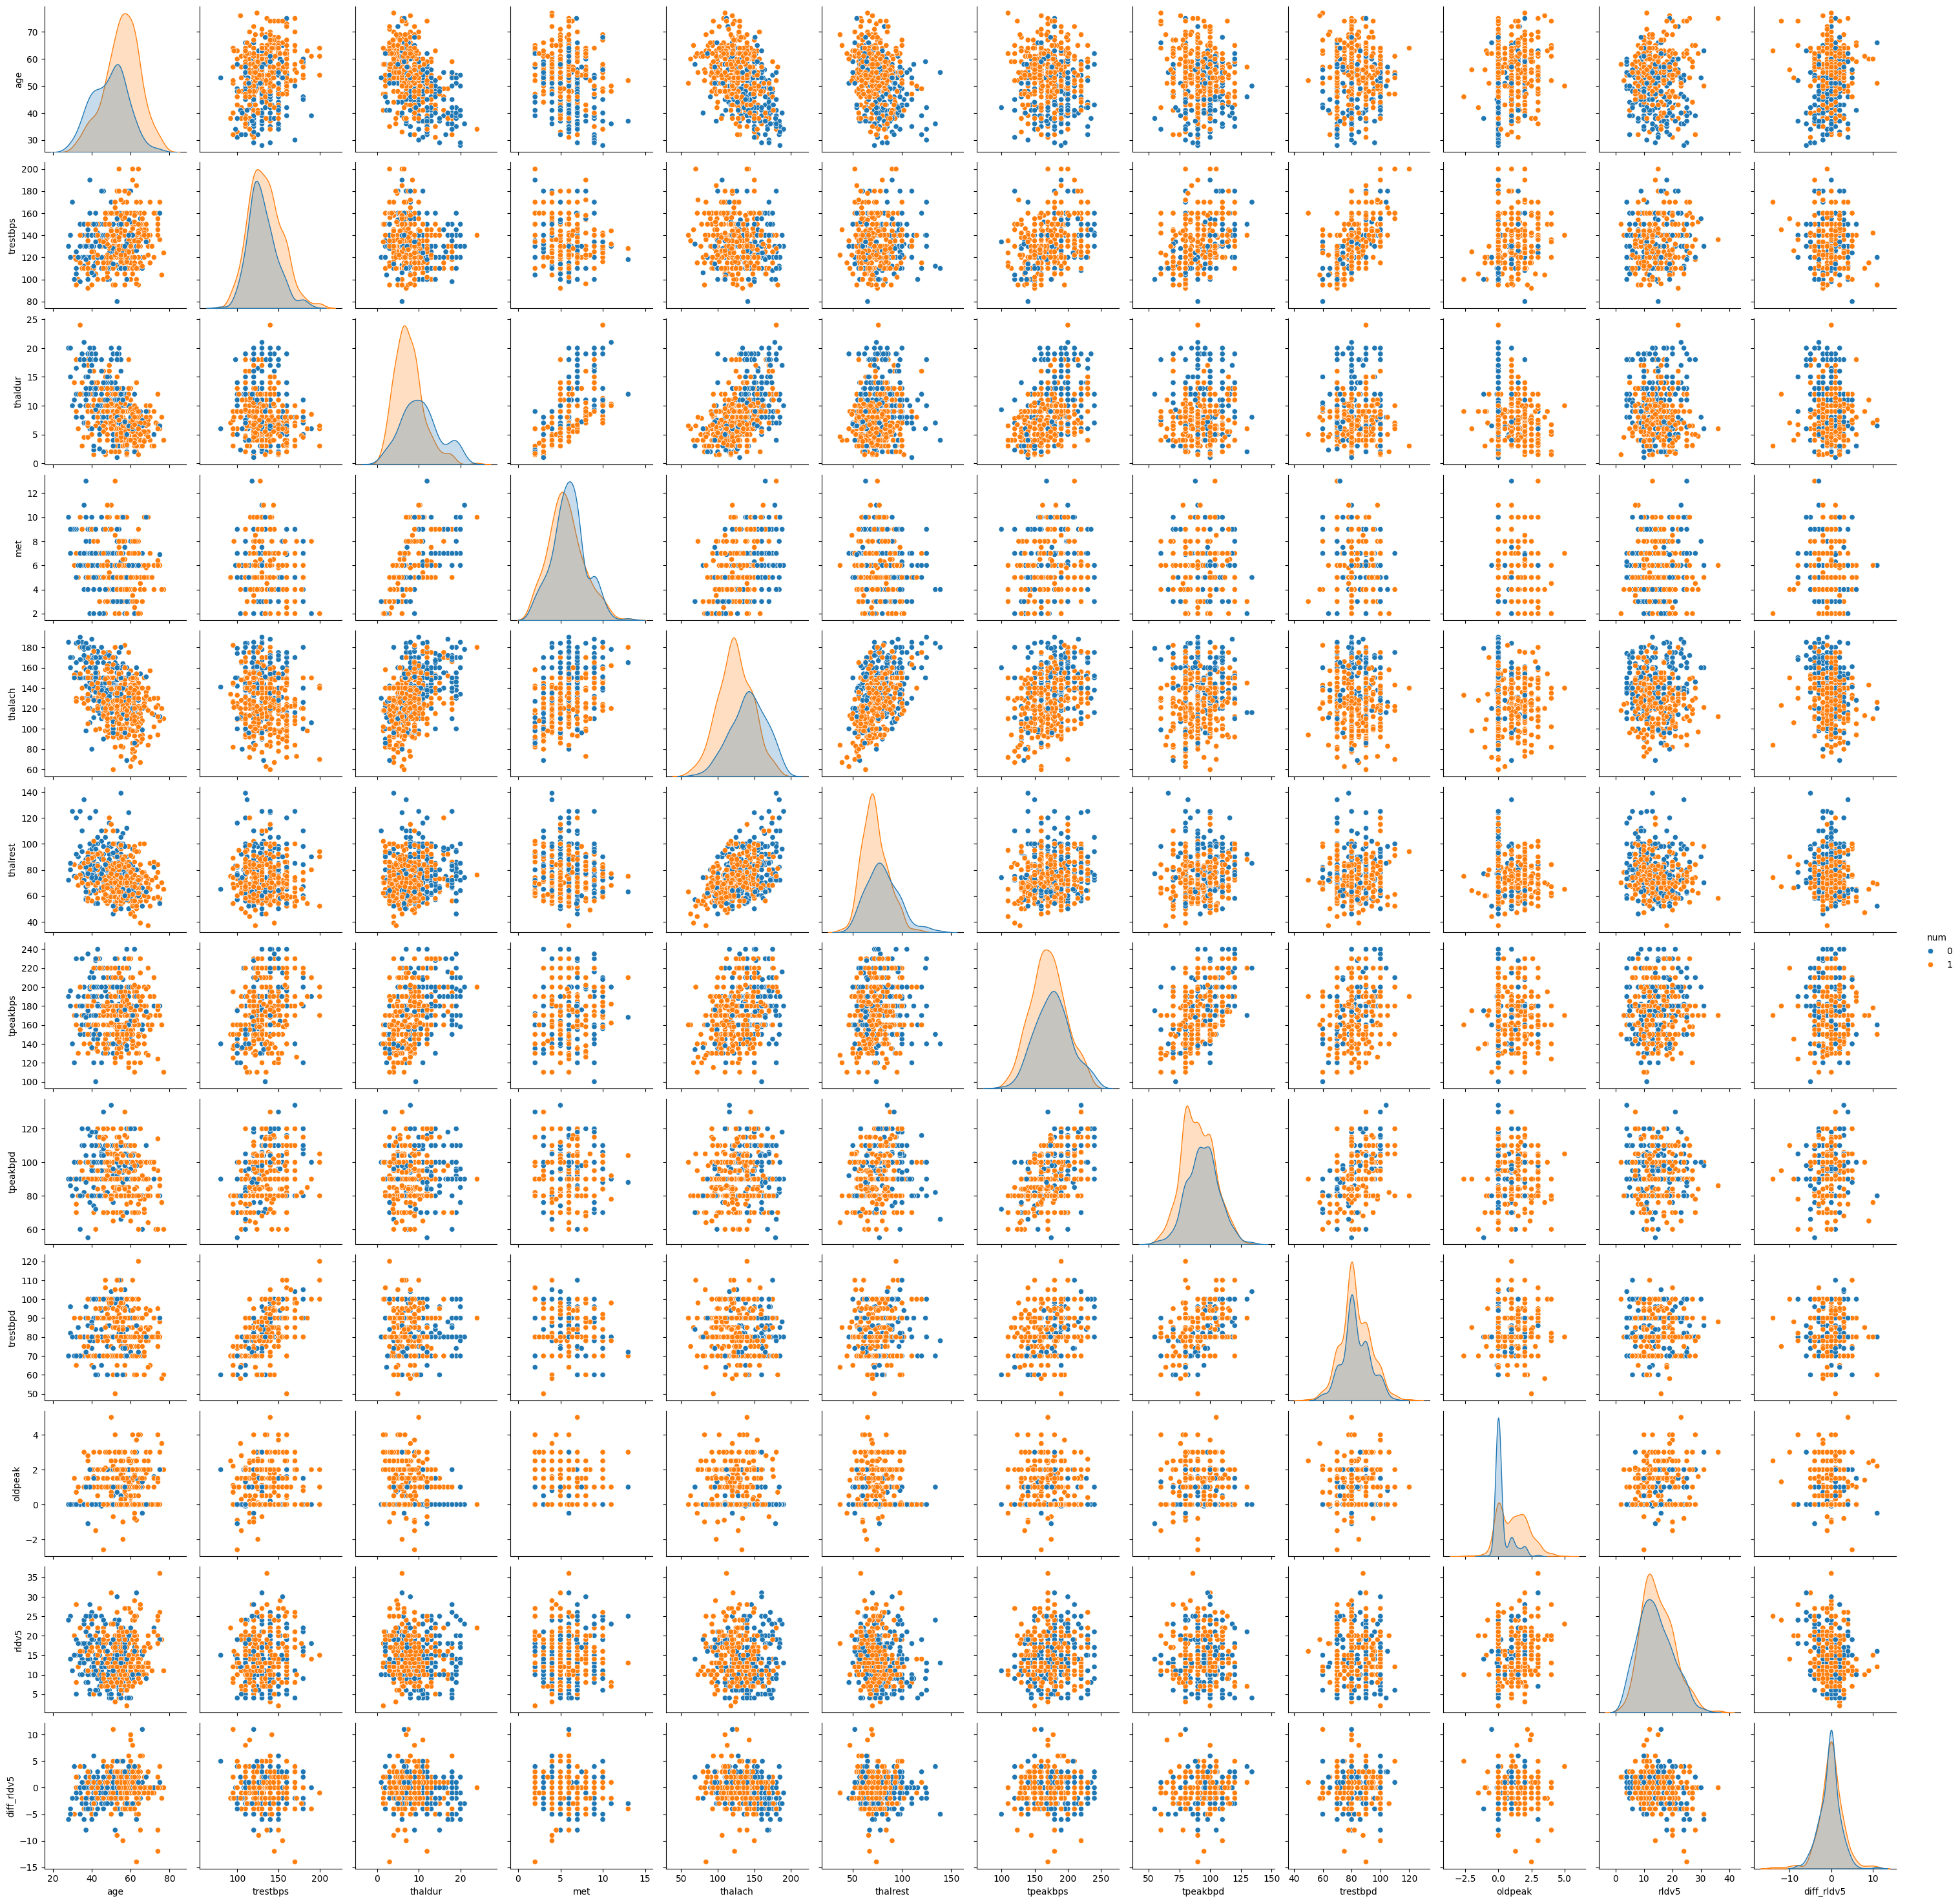

In [ ]:
sns.pairplot(data=df, hue='num');

In [ ]:
df['num']=pd.to_numeric(df['num'])

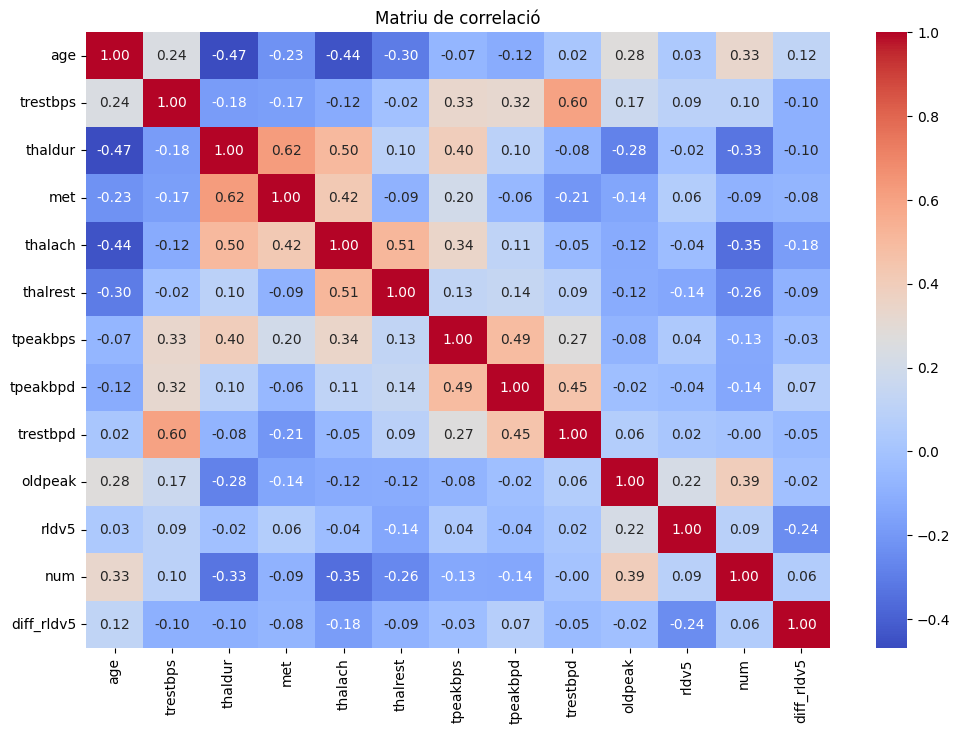

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriu de correlació')
plt.show()

In [ ]:
df['num'] = df['num'].astype('category')

## Tractament de variables categòriques

In [ ]:
len(df)

616

In [ ]:
# percentatge de NaNs

cat_cols = df.select_dtypes(include=['category']).columns

missing_cats = []
for c in cat_cols:
    count = df[c].isna().sum()
    if count > 0:
      missing_cats.append(c)
      print(c, df[c].dtype, count, str(count/len(df)*100) + "%")

relrest category 4 0.6493506493506493%
htn category 34 5.51948051948052%
restecg category 2 0.3246753246753247%
exang category 55 8.928571428571429%


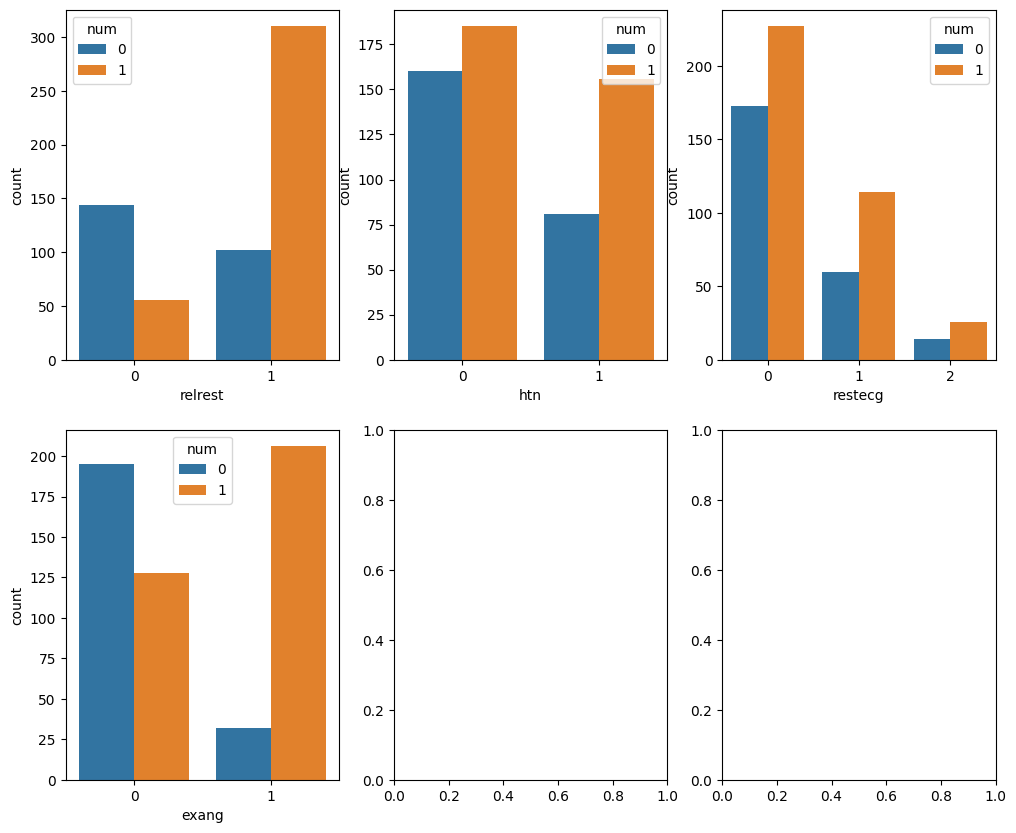

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(12,10));

for i, c in enumerate(missing_cats):
    if c == "num":
      continue
    ax = axes.reshape(-1)[i]
    a = sns.countplot(x=c,data=df, ax=ax, hue='num');

- Exang és molt important.

In [ ]:
#df.drop("pro", axis=1, inplace=True)
df.dropna(subset=df.select_dtypes(include=['category']).columns, axis=0, inplace=True)
len(df)

524

In [ ]:
# one hot encoding excepte al target

cat_cols = df.select_dtypes(include=['category']).columns
cat_no_target = cat_cols.drop(['num'])
encoded_cat = pd.get_dummies(df[cat_no_target], columns = cat_no_target)

df = pd.concat([df, encoded_cat], axis=1)
df = df.drop(cat_no_target, axis=1)

df

print(df.dtypes)

age              int64
trestbps       float64
thaldur        float64
met            float64
thalach        float64
thalrest       float64
tpeakbps       float64
tpeakbpd       float64
trestbpd       float64
oldpeak        float64
rldv5          float64
num           category
diff_rldv5     float64
sex_0             bool
sex_1             bool
painloc_0         bool
painloc_1         bool
painexer_0        bool
painexer_1        bool
relrest_0         bool
relrest_1         bool
cp_1              bool
cp_2              bool
cp_3              bool
cp_4              bool
htn_0             bool
htn_1             bool
restecg_0         bool
restecg_1         bool
restecg_2         bool
exang_0           bool
exang_1           bool
dtype: object


## Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["num"]), df["num"], test_size=0.2, random_state=1234)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X_train

(419, 31)
(419,)
(105, 31)
(105,)


age  trestbps  thaldur  met  thalach  thalrest  tpeakbps  tpeakbpd  \
460   41     104.0      2.3  2.0    111.0      72.0     120.0      80.0   
465   59       NaN      5.0  5.0    128.0      73.0     120.0      80.0   
74    55     140.0     11.0  5.0    128.0      90.0     200.0     110.0   
586   57     180.0      4.5  5.0    120.0      72.0       NaN       NaN   
454   60     120.0      6.0  6.0    133.0      64.0     180.0      90.0   
..   ...       ...      ...  ...      ...       ...       ...       ...   
281   60     120.0     10.0  5.0    135.0      73.0     145.0      90.0   
407   57     140.0      6.0  NaN    100.0      78.0     170.0     110.0   
204   31     100.0     11.0  9.0    150.0      75.0     120.0     100.0   
53    41     130.0     12.0  6.0    150.0      77.0     170.0      95.0   
297   50     145.0      6.5  NaN    139.0      82.0     180.0      95.0   

     trestbpd  oldpeak  ...   cp_2   cp_3   cp_4  htn_0  htn_1  restecg_0  \
460      64.0      0.0  ...  False  False   True   True  False      False   
465       NaN      2.0  ...  False   True  False   True  False       True   
74       90.0      1.5  ...  False  False   True   True  False       True   
586      80.0      0.8  ...   True  False  False  False   True      False   
454      72.0      2.0  ...  False  False   True   True  False       True   
..        ...      ...  ...    ...    ...    ...    ...    ...        ...   
281      80.0      0.0  ...  False   True  False   True  False      False   
407      95.0      0.0  ...  False  False   True  False   True       True   
204      70.0      0.0  ...   True  False  False   True  False      False   
53       90.0      0.0  ...   True  False  False   True  False       True   
297      90.0      0.7  ...  False  False   True   True  False       True   

     restecg_1  restecg_2  exang_0  exang_1  
460       True      False     True    False  
465      False      False    False     True  
74       False      False    False     True  
586       True      False     True    False  
454      False      False    False     True  
..         ...        ...      ...      ...  
281      False       True     True    False  
407      False      False    False     True  
204       True      False     True    False  
53       False      False     True    False  
297      False      False    False     True  

[419 rows x 31 columns]

## Escalat de variables numèriques

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), columns=df[num_cols].columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=df[num_cols].columns)


X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)


X_train = pd.concat([X_train_scaled, X_train[encoded_cat.columns]], axis=1)
X_test = pd.concat([X_test_scaled, X_test[encoded_cat.columns]], axis=1)


X_train

age  trestbps   thaldur       met   thalach  thalrest  tpeakbps  \
0    0.276596  0.111111  0.056522  0.000000  0.392308      0.33  0.142857   
1    0.659574       NaN  0.173913  0.272727  0.523077      0.34  0.142857   
2    0.574468  0.444444  0.434783  0.272727  0.523077      0.51  0.714286   
3    0.617021  0.814815  0.152174  0.272727  0.461538      0.33       NaN   
4    0.680851  0.259259  0.217391  0.363636  0.561538      0.25  0.571429   
..        ...       ...       ...       ...       ...       ...       ...   
414  0.680851  0.259259  0.391304  0.272727  0.576923      0.34  0.321429   
415  0.617021  0.444444  0.217391       NaN  0.307692      0.39  0.500000   
416  0.063830  0.074074  0.434783  0.636364  0.692308      0.36  0.142857   
417  0.276596  0.351852  0.478261  0.363636  0.692308      0.38  0.500000   
418  0.468085  0.490741  0.239130       NaN  0.607692      0.43  0.571429   

     tpeakbpd  trestbpd   oldpeak  ...   cp_2   cp_3   cp_4  htn_0  htn_1  \
0    0.285714  0.200000  0.285714  ...  False  False   True   True  False   
1    0.285714       NaN  0.571429  ...  False   True  False   True  False   
2    0.714286  0.571429  0.500000  ...  False  False   True   True  False   
3         NaN  0.428571  0.400000  ...   True  False  False  False   True   
4    0.428571  0.314286  0.571429  ...  False  False   True   True  False   
..        ...       ...       ...  ...    ...    ...    ...    ...    ...   
414  0.428571  0.428571  0.285714  ...  False   True  False   True  False   
415  0.714286  0.642857  0.285714  ...  False  False   True  False   True   
416  0.571429  0.285714  0.285714  ...   True  False  False   True  False   
417  0.500000  0.571429  0.285714  ...   True  False  False   True  False   
418  0.500000  0.571429  0.385714  ...  False  False   True   True  False   

     restecg_0  restecg_1  restecg_2  exang_0  exang_1  
0        False       True      False     True    False  
1         True      False      False    False     True  
2         True      False      False    False     True  
3        False       True      False     True    False  
4         True      False      False    False     True  
..         ...        ...        ...      ...      ...  
414      False      False       True     True    False  
415       True      False      False    False     True  
416      False       True      False     True    False  
417       True      False      False     True    False  
418       True      False      False    False     True  

[419 rows x 31 columns]

## Imputació de valors

In [ ]:
imputer = KNNImputer()
X_train_scaled = imputer.fit_transform(X_train)
X_test_scaled = imputer.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train

age  trestbps   thaldur       met   thalach  thalrest  tpeakbps  \
0    0.276596  0.111111  0.056522  0.000000  0.392308      0.33  0.142857   
1    0.659574  0.324074  0.173913  0.272727  0.523077      0.34  0.142857   
2    0.574468  0.444444  0.434783  0.272727  0.523077      0.51  0.714286   
3    0.617021  0.814815  0.152174  0.272727  0.461538      0.33  0.580000   
4    0.680851  0.259259  0.217391  0.363636  0.561538      0.25  0.571429   
..        ...       ...       ...       ...       ...       ...       ...   
414  0.680851  0.259259  0.391304  0.272727  0.576923      0.34  0.321429   
415  0.617021  0.444444  0.217391  0.218182  0.307692      0.39  0.500000   
416  0.063830  0.074074  0.434783  0.636364  0.692308      0.36  0.142857   
417  0.276596  0.351852  0.478261  0.363636  0.692308      0.38  0.500000   
418  0.468085  0.490741  0.239130  0.345455  0.607692      0.43  0.571429   

     tpeakbpd  trestbpd   oldpeak  ...  cp_2  cp_3  cp_4  htn_0  htn_1  \
0    0.285714  0.200000  0.285714  ...   0.0   0.0   1.0    1.0    0.0   
1    0.285714  0.485714  0.571429  ...   0.0   1.0   0.0    1.0    0.0   
2    0.714286  0.571429  0.500000  ...   0.0   0.0   1.0    1.0    0.0   
3    0.428571  0.428571  0.400000  ...   1.0   0.0   0.0    0.0    1.0   
4    0.428571  0.314286  0.571429  ...   0.0   0.0   1.0    1.0    0.0   
..        ...       ...       ...  ...   ...   ...   ...    ...    ...   
414  0.428571  0.428571  0.285714  ...   0.0   1.0   0.0    1.0    0.0   
415  0.714286  0.642857  0.285714  ...   0.0   0.0   1.0    0.0    1.0   
416  0.571429  0.285714  0.285714  ...   1.0   0.0   0.0    1.0    0.0   
417  0.500000  0.571429  0.285714  ...   1.0   0.0   0.0    1.0    0.0   
418  0.500000  0.571429  0.385714  ...   0.0   0.0   1.0    1.0    0.0   

     restecg_0  restecg_1  restecg_2  exang_0  exang_1  
0          0.0        1.0        0.0      1.0      0.0  
1          1.0        0.0        0.0      0.0      1.0  
2          1.0        0.0        0.0      0.0      1.0  
3          0.0        1.0        0.0      1.0      0.0  
4          1.0        0.0        0.0      0.0      1.0  
..         ...        ...        ...      ...      ...  
414        0.0        0.0        1.0      1.0      0.0  
415        1.0        0.0        0.0      0.0      1.0  
416        0.0        1.0        0.0      1.0      0.0  
417        1.0        0.0        0.0      1.0      0.0  
418        1.0        0.0        0.0      0.0      1.0  

[419 rows x 31 columns]

In [ ]:
X_train[encoded_cat.columns] = X_train[encoded_cat.columns].astype('bool')
X_test[encoded_cat.columns] = X_test[encoded_cat.columns].astype('bool')

X_train

age  trestbps   thaldur       met   thalach  thalrest  tpeakbps  \
0    0.276596  0.111111  0.056522  0.000000  0.392308      0.33  0.142857   
1    0.659574  0.324074  0.173913  0.272727  0.523077      0.34  0.142857   
2    0.574468  0.444444  0.434783  0.272727  0.523077      0.51  0.714286   
3    0.617021  0.814815  0.152174  0.272727  0.461538      0.33  0.580000   
4    0.680851  0.259259  0.217391  0.363636  0.561538      0.25  0.571429   
..        ...       ...       ...       ...       ...       ...       ...   
414  0.680851  0.259259  0.391304  0.272727  0.576923      0.34  0.321429   
415  0.617021  0.444444  0.217391  0.218182  0.307692      0.39  0.500000   
416  0.063830  0.074074  0.434783  0.636364  0.692308      0.36  0.142857   
417  0.276596  0.351852  0.478261  0.363636  0.692308      0.38  0.500000   
418  0.468085  0.490741  0.239130  0.345455  0.607692      0.43  0.571429   

     tpeakbpd  trestbpd   oldpeak  ...   cp_2   cp_3   cp_4  htn_0  htn_1  \
0    0.285714  0.200000  0.285714  ...  False  False   True   True  False   
1    0.285714  0.485714  0.571429  ...  False   True  False   True  False   
2    0.714286  0.571429  0.500000  ...  False  False   True   True  False   
3    0.428571  0.428571  0.400000  ...   True  False  False  False   True   
4    0.428571  0.314286  0.571429  ...  False  False   True   True  False   
..        ...       ...       ...  ...    ...    ...    ...    ...    ...   
414  0.428571  0.428571  0.285714  ...  False   True  False   True  False   
415  0.714286  0.642857  0.285714  ...  False  False   True  False   True   
416  0.571429  0.285714  0.285714  ...   True  False  False   True  False   
417  0.500000  0.571429  0.285714  ...   True  False  False   True  False   
418  0.500000  0.571429  0.385714  ...  False  False   True   True  False   

     restecg_0  restecg_1  restecg_2  exang_0  exang_1  
0        False       True      False     True    False  
1         True      False      False    False     True  
2         True      False      False    False     True  
3        False       True      False     True    False  
4         True      False      False    False     True  
..         ...        ...        ...      ...      ...  
414      False      False       True     True    False  
415       True      False      False    False     True  
416      False       True      False     True    False  
417       True      False      False     True    False  
418       True      False      False    False     True  

[419 rows x 31 columns]

# Models plantejats

Anem a plantejar models tenint en compte que volem un classificador que utilitzi variables numèriques i categòriques i que sigui compatible amb valors NaN.

Possibles models:


1.   Regressió logística
4.   Naive Bayes classfier (laplace smoothing?)
5.   Random forest (f1-score, class_weight no cal)
6.   SVM
7.   Gradient boosting



Definim les mètriques

In [ ]:
fbeta_scorer = make_scorer(fbeta_score, beta=2)

scoring = {
    'f2': fbeta_scorer,
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

results_df = pd.DataFrame(index=[], columns= ['F2', 'Accuracy', 'F1', 'Precision', 'Recall'])
importance = pd.DataFrame(index=[])

## **Naive Bayes**



Hem de transformar les variables numèriques en gaussianes => Potser podem descartar Gaussian NB perquè les variables disten molt d'una normal encara que les transformem

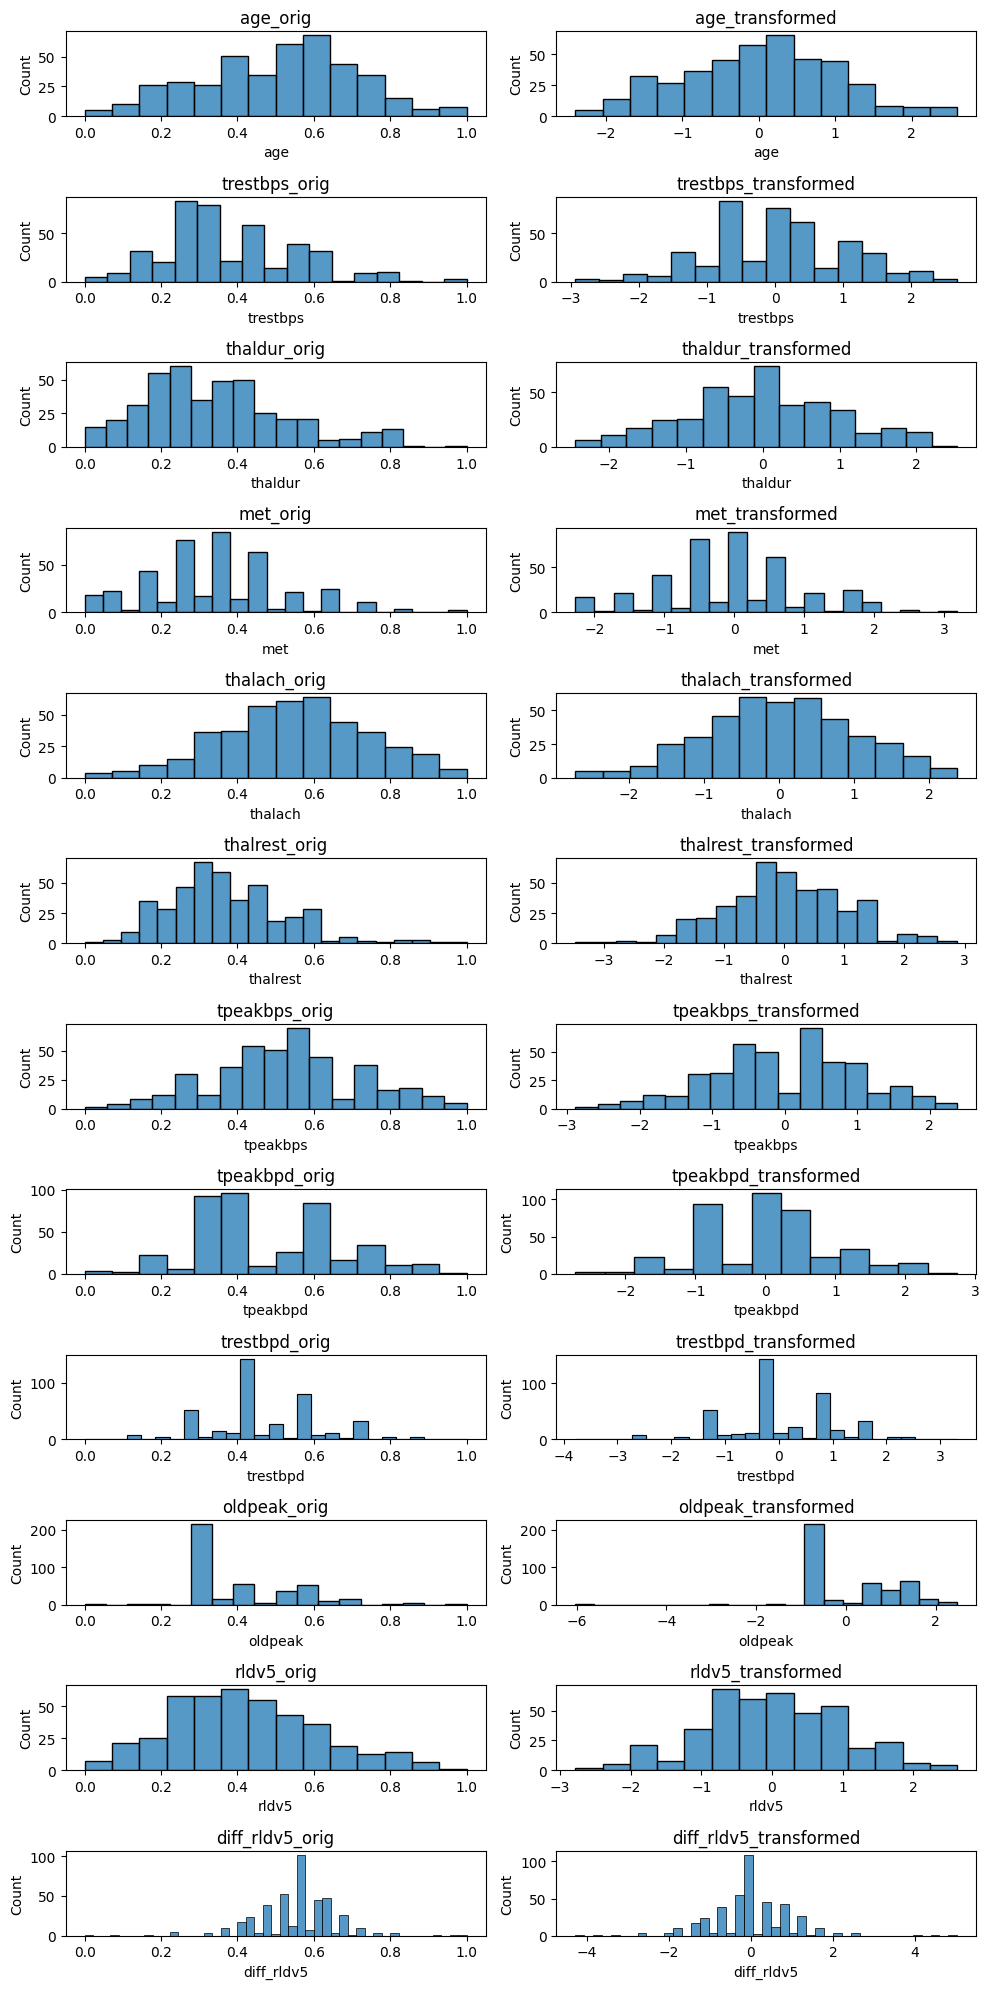

In [ ]:
X_train_transformed = X_train.copy()
X_test_transformed = X_test.copy()

pt = PowerTransformer(method='yeo-johnson')

X_train_transformed[num_cols] = pt.fit_transform(X_train_transformed[num_cols])
X_test_transformed[num_cols] = pt.transform(X_test_transformed[num_cols])

fig, axes = plt.subplots(len(num_cols), 2, figsize=(10, 20))


for i, c in enumerate(num_cols):
    # El primer subplot en la fila i, columna 0 para el original
    ax1 = axes[i, 0]
    sns.histplot(x=c, data=X_train, ax=ax1)
    ax1.set_title(f"{c}_orig")

    # El segundo subplot en la fila i, columna 1 para el transformado
    ax2 = axes[i, 1]
    sns.histplot(x=c, data=X_train_transformed, ax=ax2)
    ax2.set_title(f"{c}_transformed")

plt.tight_layout()
plt.show()

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=1234)

accuracies = []
precisions = []
recalls = []
f1s = []
f2s = []


for train_index, val_index in cv.split(X_train_transformed, y_train):
    _X_train, _X_val = X_train_transformed.iloc[train_index], X_train_transformed.iloc[val_index]
    _y_train, _y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    X_train_cat = _X_train.select_dtypes(include=['bool'])
    X_train_num = _X_train.select_dtypes(include=['int64', 'float64'])
    X_val_cat = _X_val.select_dtypes(include=['bool'])
    X_val_num = _X_val.select_dtypes(include=['int64', 'float64'])

    bnb = BernoulliNB()
    gnb = GaussianNB()
    gnb.fit(X_train_num, _y_train)
    bnb.fit(X_train_cat, _y_train)

    num_probs = gnb.predict_proba(X_val_num)
    cat_probs = bnb.predict_proba(X_val_cat)

    combined_probs = num_probs * cat_probs
    combined_probs = combined_probs / combined_probs.sum(axis=1, keepdims=True)
    y_pred_cv = np.argmax(combined_probs, axis=1)

    accuracies.append(accuracy_score(_y_val, y_pred_cv))
    precisions.append(precision_score(_y_val, y_pred_cv))
    recalls.append(recall_score(_y_val, y_pred_cv))
    f1s.append(f1_score(_y_val, y_pred_cv))
    f2s.append(fbeta_score(_y_val, y_pred_cv, beta = 2))


results_df.loc['Naive Bayes'] = [np.mean(f2s), np.mean(accuracies), np.mean(f1s), np.mean(precisions), np.mean(recalls)]
results_df

F2  Accuracy        F1  Precision    Recall
Naive Bayes  0.84337  0.799684  0.832822   0.816933  0.850884

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


cv = KFold(n_splits=5, shuffle=True, random_state=1234)

accuracies = []
precisions = []
recalls = []
f1s = []
f2s = []


for train_index, val_index in cv.split(X_train_transformed, y_train):
    _X_train, _X_val = X_train_transformed.iloc[train_index], X_train_transformed.iloc[val_index]
    _y_train, _y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    X_train_cat = _X_train.select_dtypes(include=['bool'])
    X_train_num = _X_train.select_dtypes(include=['int64', 'float64'])
    X_val_cat = _X_val.select_dtypes(include=['bool'])
    X_val_num = _X_val.select_dtypes(include=['int64', 'float64'])

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(_X_train, _y_train)
    y_pred_cv = qda.predict(_X_val)

    accuracies.append(accuracy_score(_y_val, y_pred_cv))
    precisions.append(precision_score(_y_val, y_pred_cv))
    recalls.append(recall_score(_y_val, y_pred_cv))
    f1s.append(f1_score(_y_val, y_pred_cv))
    f2s.append(fbeta_score(_y_val, y_pred_cv, beta = 2))


results_df.loc['QDA'] = [np.mean(f2s), np.mean(accuracies), np.mean(f1s), np.mean(precisions), np.mean(recalls)]
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


F2  Accuracy        F1  Precision    Recall
Naive Bayes  0.843370  0.799684  0.832822   0.816933  0.850884
QDA          0.801474  0.761474  0.794262   0.794113  0.809238

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


cv = KFold(n_splits=5, shuffle=True, random_state=1234)

accuracies = []
precisions = []
recalls = []
f1s = []
f2s = []


for train_index, val_index in cv.split(X_train_transformed, y_train):
    _X_train, _X_val = X_train_transformed.iloc[train_index], X_train_transformed.iloc[val_index]
    _y_train, _y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    X_train_cat = _X_train.select_dtypes(include=['bool'])
    X_train_num = _X_train.select_dtypes(include=['int64', 'float64'])
    X_val_cat = _X_val.select_dtypes(include=['bool'])
    X_val_num = _X_val.select_dtypes(include=['int64', 'float64'])

    lda = LinearDiscriminantAnalysis()
    lda.fit(_X_train, _y_train)
    y_pred_cv = lda.predict(_X_val)

    accuracies.append(accuracy_score(_y_val, y_pred_cv))
    precisions.append(precision_score(_y_val, y_pred_cv))
    recalls.append(recall_score(_y_val, y_pred_cv))
    f1s.append(f1_score(_y_val, y_pred_cv))
    f2s.append(fbeta_score(_y_val, y_pred_cv, beta = 2))


results_df.loc['LDA'] = [np.mean(f2s), np.mean(accuracies), np.mean(f1s), np.mean(precisions), np.mean(recalls)]
results_df

F2  Accuracy        F1  Precision    Recall
Naive Bayes  0.843370  0.799684  0.832822   0.816933  0.850884
QDA          0.801474  0.761474  0.794262   0.794113  0.809238
LDA          0.847546  0.816322  0.843403   0.839165  0.851039

In [ ]:
# retorna model fitejat i parametres optims
def validar_model(name, model, params, train_x, train_y, return_crossval_results = False):
  grid_search = GridSearchCV(estimator=model,
                            param_grid=params,
                            cv=5, scoring = scoring,
                            return_train_score=False,
                            refit='f2', n_jobs=-1)

  grid_search.fit(train_x, train_y)

  cross_val_results = pd.DataFrame(grid_search.cv_results_)
  filtered_results = cross_val_results

  '''for i in range(len(cross_val_results)):
        param_combination = cross_val_results.loc[i, 'params']
        mean_test_f2 = cross_val_results.loc[i, 'mean_test_f2']
        mean_test_f1 = cross_val_results.loc[i, 'mean_test_f1']
        mean_test_accuracy = cross_val_results.loc[i, 'mean_test_accuracy']
        mean_test_precision = cross_val_results.loc[i, 'mean_test_precision']
        mean_test_recall = cross_val_results.loc[i, 'mean_test_recall']

        print(f"Params: {param_combination}")
        print(f"mean_test_f2: {mean_test_f2}")
        print(f"mean_test_f1: {mean_test_f1}")
        print(f"mean_test_accuracy: {mean_test_accuracy}")
        print(f"mean_test_precision: {mean_test_precision}")
        print(f"mean_test_recall: {mean_test_recall}")
        print("-" * 40)'''

  for param, value in grid_search.best_params_.items():
    filtered_results = filtered_results[filtered_results[f'param_{param}'] == value]
  fresults = filtered_results[['mean_test_f2', 'mean_test_accuracy', 'mean_test_f1','mean_test_precision', 'mean_test_recall']].mean().values
  results_df.loc[name] = fresults

  if not return_crossval_results:
    return grid_search.best_estimator_, grid_search.best_params_
  else:
    return grid_search.best_estimator_, grid_search.best_params_, fresults



## **Regressió logística**


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

Params: {'C': 0, 'solver': 'liblinear'}
mean_test_f2: nan
mean_test_f1: nan
mean_test_accuracy: nan
mean_test_precision: nan
mean_test_recall: nan
----------------------------------------
Params: {'C': 0, 'solver': 'lbfgs'}
mean_test_f2: nan
mean_test_f1: nan
mean_test_accuracy: nan
mean_test_precision: nan
mean_test_recall: nan
----------------------------------------
Params: {'C': 0.0001, 'solver': 'liblinear'}
mean_test_f2: 0.8823454971530929
mean_test_f1: 0.7500058719906046
mean_test_accuracy: 0.6085771658060815
mean_test_precision: 0.6000355532337117
mean_test_recall: 1.0
----------------------------------------
Params: {'C': 0.0001, 'solver': 'lbfgs'}
mean_test_f2: 0.8766835781715383
mean_test_f1: 0.7398438429860267
mean_test_accuracy: 0.5871199082042455
mean_test_precision: 0.5871199082042455
mean_test_recall: 1.0
----------------------------------------
Params: {'C': 0.001, 'solver': 'liblinear'}
mean_test_f2: 0.8861071727332634
mean_test_f1: 0.7993122069496525
mean_test_accura

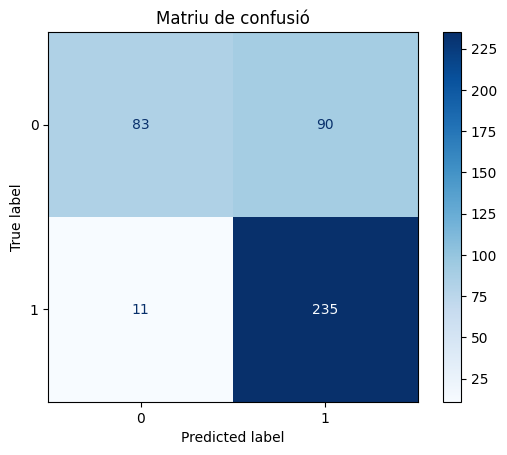

Prediccions: [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 0 1]
[[ 2.20411455e-02  1.12787287e-02 -4.83764675e-03  4.58143740e-03
  -3.06644416e-03 -6.56547068e-04  5.82502048e-03  3.43656892e-03
   8

F2  Accuracy        F1  Precision    Recall
Naive Bayes          0.843370  0.799684  0.832822   0.816933  0.850884
QDA                  0.801474  0.761474  0.794262   0.794113  0.809238
LDA                  0.847546  0.816322  0.843403   0.839165  0.851039
Logistic regression  0.886107  0.718359  0.799312   0.687502  0.955510

In [ ]:
model = LogisticRegression(max_iter=10000, random_state=1234, n_jobs=-1)
param_grid = {
    #'C': [0.001],
    'C': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'solver': ['liblinear', 'lbfgs']
}

logreg, logreg_params = validar_model("Logistic regression", model, param_grid, X_train, y_train)

y_pred = logreg.predict(X_train)
conf_matrix = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)

plt.title('Matriu de confusió')
plt.show()

print("Prediccions:", y_pred)

print(logreg.coef_)
print("max mòdul coef:", X_train.columns[np.argmax(np.abs(logreg.coef_))])
print("min mòdul coef:", X_train.columns[np.argmin(np.abs(logreg.coef_))])

print(logreg_params)
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


Params: {'C': 100, 'solver': 'liblinear'}
mean_test_f2: 0.8455239646395689
mean_test_f1: 0.8457167160325054
mean_test_accuracy: 0.8186460126219164
mean_test_precision: 0.8466726342710997
mean_test_recall: 0.8455510204081633
----------------------------------------
Params: {'C': 100, 'solver': 'lbfgs'}
mean_test_f2: 0.8455239646395689
mean_test_f1: 0.8457167160325054
mean_test_accuracy: 0.8186460126219164
mean_test_precision: 0.8466726342710997
mean_test_recall: 0.8455510204081633
----------------------------------------


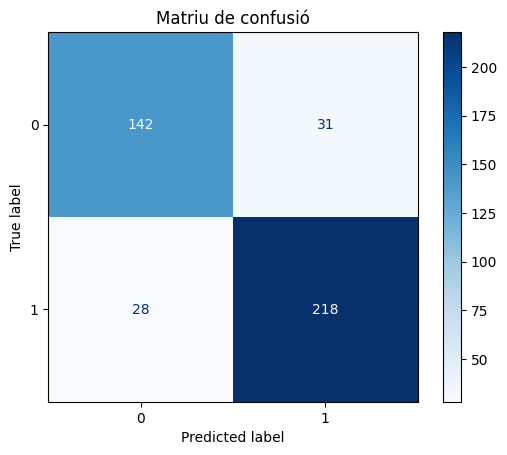

Prediccions: [0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0
 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1
 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1
 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1
 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0
 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1
 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1
 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1
 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 1 1 0 1 0 1 0 0 1]
[[ 0.97249162 -0.02672833 -3.42370872  3.85870696 -1.9117874  -0.17471211
   1.61344164 -2.16269904  0.21925181  4.71357017 -0.32790406 

F2  Accuracy        F1  Precision    Recall
Logistic regression  0.845524  0.818646  0.845717   0.846673  0.845551

In [ ]:
model = LogisticRegression(max_iter=10000, random_state=1234, n_jobs=-1)
param_grid = {
    'C': [100],
    #'C': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'solver': ['liblinear', 'lbfgs']
}

logreg, logreg_params = validar_model("Logistic regression", model, param_grid, X_train, y_train)

y_pred = logreg.predict(X_train)
conf_matrix = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)

plt.title('Matriu de confusió')
plt.show()

print("Prediccions:", y_pred)

print(logreg.coef_)
print("max mòdul coef:", X_train.columns[np.argmax(np.abs(logreg.coef_))])
print("min mòdul coef:", X_train.columns[np.argmin(np.abs(logreg.coef_))])


print(logreg_params)
results_df

In [ ]:
results_df

F2  Accuracy        F1  Precision    Recall
Naive Bayes          0.843370  0.799684  0.832822   0.816933  0.850884
KNN                  0.849989  0.806713  0.838605   0.821299  0.858041
Random forest        0.870325  0.830436  0.859251   0.841999  0.878041
Gradient boosting    0.879610  0.835198  0.864262   0.840303  0.890286
SVC                  0.897520  0.732731  0.810022   0.697344  0.967510
Logistic regression  0.886107  0.718359  0.799312   0.687502  0.955510

## **KNN**

In [ ]:
model = KNeighborsClassifier(n_jobs=-1)
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn, knn_params = validar_model("KNN", model, param_grid, X_train, y_train)

print(knn_params)
results_df

Params: {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
mean_test_f2: 0.6801775728757999
mean_test_f1: 0.7379848703914815
mean_test_accuracy: 0.7327882960413081
mean_test_precision: 0.8624392892968744
mean_test_recall: 0.6466938775510205
----------------------------------------
Params: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
mean_test_f2: 0.7941902986728675
mean_test_f1: 0.7904804708275852
mean_test_accuracy: 0.7518359150889271
mean_test_precision: 0.7848869417080978
mean_test_recall: 0.7968163265306123
----------------------------------------
Params: {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
mean_test_f2: 0.6943608169971996
mean_test_f1: 0.747834411583109
mean_test_accuracy: 0.7399311531841652
mean_test_precision: 0.8610108810108811
mean_test_recall: 0.6631020408163265
----------------------------------------
Params: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
mean_test_f2: 0.7978570479929744
mean_test_f1: 0.7996545880240521
mean_test_accuracy: 0.76617900172117

F2  Accuracy        F1  \
Gradient boosting lololo ninguna removed  0.885766  0.847189  0.873323   
Gradient boosting painloc_0 removed       0.885907  0.830436  0.862550   
Gradient boosting painloc_1 removed       0.886911  0.842398  0.870358   
Gradient boosting relrest_0 removed       0.885177  0.828084  0.860890   
Gradient boosting cp_1 removed            0.885433  0.837608  0.867163   
Gradient boosting relrest_1 removed       0.885000  0.785141  0.834332   
Gradient boosting trestbps removed        0.888813  0.839960  0.869339   
Gradient boosting cp_4 removed            0.892782  0.794779  0.841605   
Gradient boosting met removed             0.892782  0.794779  0.841605   
Gradient boosting thalrest removed        0.893798  0.806741  0.848616   
Gradient boosting tpeakbps removed        0.893512  0.797160  0.843207   
Gradient boosting trestbpd removed        0.893798  0.806741  0.848616   
Gradient boosting rldv5 removed           0.893512  0.797160  0.843207   
Gradient boosting diff_rldv5 removed      0.893798  0.806741  0.848616   
Gradient boosting cp_2 removed            0.893512  0.797160  0.843207   
Gradient boosting sex_0 removed           0.893512  0.797160  0.843207   
KNN                                       0.849989  0.806713  0.838605   

                                          Precision    Recall  
Gradient boosting lololo ninguna removed   0.853721  0.894367  
Gradient boosting painloc_0 removed        0.827553  0.902612  
Gradient boosting painloc_1 removed        0.844589  0.898449  
Gradient boosting relrest_0 removed        0.824426  0.902531  
Gradient boosting cp_1 removed             0.839867  0.898531  
Gradient boosting relrest_1 removed        0.763203  0.923020  
Gradient boosting trestbps removed         0.839483  0.902531  
Gradient boosting cp_4 removed             0.769761  0.931184  
Gradient boosting met removed              0.769761  0.931184  
Gradient boosting thalrest removed         0.783688  0.927102  
Gradient boosting tpeakbps removed         0.772384  0.931184  
Gradient boosting trestbpd removed         0.783688  0.927102  
Gradient boosting rldv5 removed            0.772384  0.931184  
Gradient boosting diff_rldv5 removed       0.783688  0.927102  
Gradient boosting cp_2 removed             0.772384  0.931184  
Gradient boosting sex_0 removed            0.772384  0.931184  
KNN                                        0.821299  0.858041

## **Random forest**

Params: {'max_features': 'sqrt', 'n_estimators': 1}
mean_test_f2: 0.7722363991163148
mean_test_f1: 0.773193537420766
mean_test_accuracy: 0.7374354561101549
mean_test_precision: 0.7780555555555556
mean_test_recall: 0.772326530612245
----------------------------------------
Params: {'max_features': 'sqrt', 'n_estimators': 5}
mean_test_f2: 0.8011486713404139
mean_test_f1: 0.8017047679286768
mean_test_accuracy: 0.7685025817555937
mean_test_precision: 0.8038040396261421
mean_test_recall: 0.801061224489796
----------------------------------------
Params: {'max_features': 'sqrt', 'n_estimators': 25}
mean_test_f2: 0.8626354367476331
mean_test_f1: 0.8461662559086378
mean_test_accuracy: 0.813740676993689
mean_test_precision: 0.820555144202203
mean_test_recall: 0.8741224489795918
----------------------------------------
Params: {'max_features': 'sqrt', 'n_estimators': 50}
mean_test_f2: 0.8514441011251973
mean_test_f1: 0.8422776318448172
mean_test_accuracy: 0.8113023522662075
mean_test_precision: 

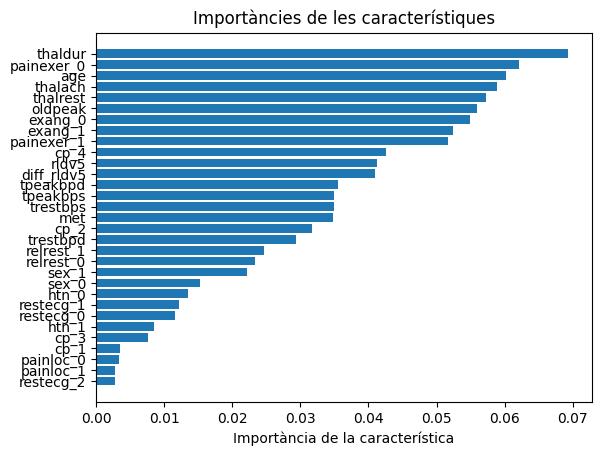

F2  Accuracy        F1  Precision    Recall
Naive Bayes          0.843370  0.799684  0.832822   0.816933  0.850884
QDA                  0.801474  0.761474  0.794262   0.794113  0.809238
LDA                  0.847546  0.816322  0.843403   0.839165  0.851039
Logistic regression  0.886107  0.718359  0.799312   0.687502  0.955510
KNN                  0.849989  0.806713  0.838605   0.821299  0.858041
Random forest        0.870325  0.830436  0.859251   0.841999  0.878041

In [ ]:
model = RandomForestClassifier(random_state=1234, n_jobs=-1, max_depth=None)
param_grid = {
    'n_estimators': [1, 5, 25, 50, 75, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    #'max_depth': [None]
}

rf, rf_params, crossval_results = validar_model("Random forest", model, param_grid, X_train, y_train, True)

print(rf_params)

plot_importances(rf)

results_df

<ipython-input-55-6e862f49ac0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_val_results['param_max_features'] = cross_val_results['param_max_features'].astype(str)
<ipython-input-55-6e862f49ac0b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_val_results['param_n_estimators'] = cross_val_results['param_n_estimators'].astype(str)
<ipython-input-55-6e862f49ac0b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

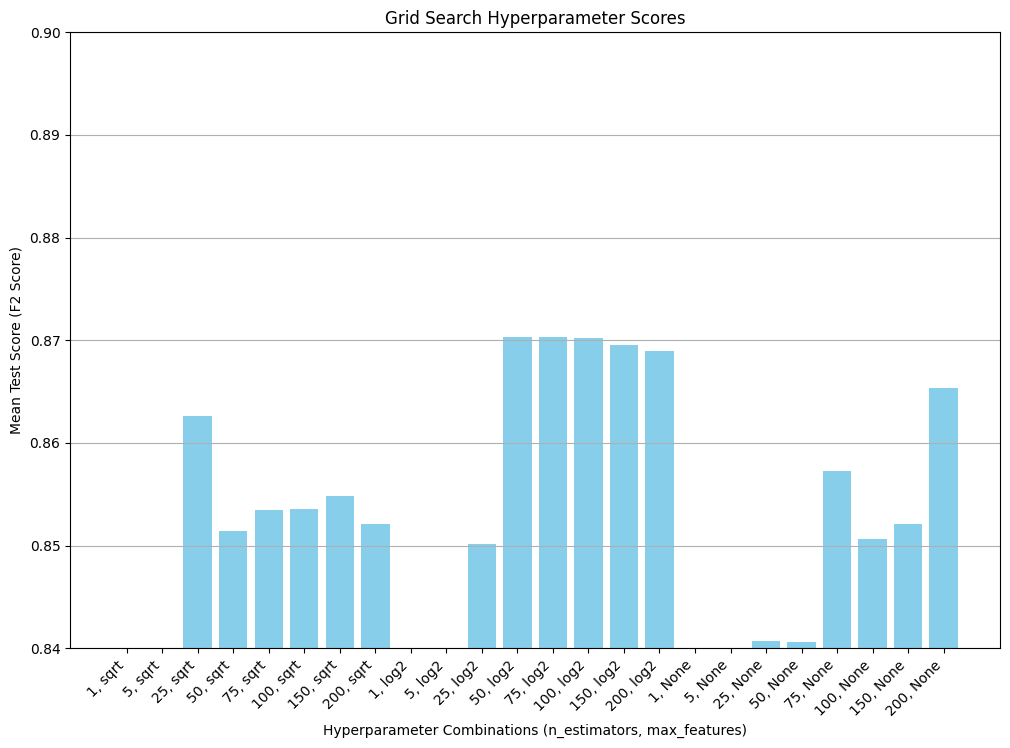

In [ ]:
cols_of_interest = ['param_n_estimators', 'param_max_features', 'mean_test_f2']
cross_val_results = crossval_results[cols_of_interest]

# Convertir las columnas de parámetros a strings para una mejor visualización
cross_val_results['param_max_features'] = cross_val_results['param_max_features'].astype(str)
cross_val_results['param_n_estimators'] = cross_val_results['param_n_estimators'].astype(str)


cross_val_results['params'] = cross_val_results['param_n_estimators'] + ', ' + cross_val_results['param_max_features']

Ncross_val_results = cross_val_results.sort_values(by='mean_test_f2', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(cross_val_results['params'], cross_val_results['mean_test_f2'], color='skyblue')
plt.xlabel('Hyperparameter Combinations (n_estimators, max_features)')
plt.ylabel('Mean Test Score (F2 Score)')
plt.ylim(0.84, 0.9)
plt.title('Grid Search Hyperparameter Scores')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


## **Gradient boosting**

In [ ]:
model = GradientBoostingClassifier(random_state=1234)

param_grid = {
    'loss': ["log_loss", "exponential"],
    'n_estimators': [1, 5, 25, 50, 75, 100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15, 1, 2],
    'max_depth': [3, 4, 5]
}

gb, gb_params, crossval_results = validar_model("Gradient boosting", model, param_grid, X_train, y_train, True)

print(gb_params)

results_df

Params: {'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 1}
mean_test_f2: 0.8766835781715383
mean_test_f1: 0.7398438429860267
mean_test_accuracy: 0.5871199082042455
mean_test_precision: 0.5871199082042455
mean_test_recall: 1.0
----------------------------------------
Params: {'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 5}
mean_test_f2: 0.8850000703679826
mean_test_f1: 0.8343324791150877
mean_test_accuracy: 0.785140562248996
mean_test_precision: 0.7632032660721186
mean_test_recall: 0.9230204081632654
----------------------------------------
Params: {'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 25}
mean_test_f2: 0.8596195434854419
mean_test_f1: 0.8334876271835207
mean_test_accuracy: 0.7947217441193344
mean_test_precision: 0.7945487032946247
mean_test_recall: 0.8783673469387756
----------------------------------------
Params: {'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 5

F2  Accuracy        F1  Precision    Recall
Naive Bayes        0.843370  0.799684  0.832822   0.816933  0.850884
QDA                0.801474  0.761474  0.794262   0.794113  0.809238
Gradient boosting  0.885766  0.847189  0.873323   0.853721  0.894367

## **SVM**

In [ ]:
param_grid = {
    #'C': [0.001, 20],
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10, 20],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],
    'degree': [2, 3, 4, 5]  # només pel kernel poly
}

model = SVC(random_state=1234)

svc, svc_params = validar_model("SVC", model, param_grid, X_train, y_train)

#print("max coef:", X_train.columns[np.argmax(svc.coef_)])
#print("min coef:", X_train.columns[np.argmin(svc.coef_)])

print(svc_params)

results_df

Params: {'C': 0.001, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
mean_test_f2: 0.8766835781715383
mean_test_f1: 0.7398438429860267
mean_test_accuracy: 0.5871199082042455
mean_test_precision: 0.5871199082042455
mean_test_recall: 1.0
----------------------------------------
Params: {'C': 0.001, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
mean_test_f2: 0.8766835781715383
mean_test_f1: 0.7398438429860267
mean_test_accuracy: 0.5871199082042455
mean_test_precision: 0.5871199082042455
mean_test_recall: 1.0
----------------------------------------
Params: {'C': 0.001, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
mean_test_f2: 0.8766835781715383
mean_test_f1: 0.7398438429860267
mean_test_accuracy: 0.5871199082042455
mean_test_precision: 0.5871199082042455
mean_test_recall: 1.0
----------------------------------------
Params: {'C': 0.001, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
mean_test_f2: 0.8766835781715383
mean_test_f1: 0.7398438429860267
mean_test_accuracy: 0.587119

F2  Accuracy        F1  Precision    Recall
Naive Bayes          0.843370  0.799684  0.832822   0.816933  0.850884
QDA                  0.801474  0.761474  0.794262   0.794113  0.809238
LDA                  0.847546  0.816322  0.843403   0.839165  0.851039
Logistic regression  0.886107  0.718359  0.799312   0.687502  0.955510
KNN                  0.849989  0.806713  0.838605   0.821299  0.858041
Random forest        0.870325  0.830436  0.859251   0.841999  0.878041
Gradient boosting    0.885766  0.847189  0.873323   0.853721  0.894367
SVC                  0.897520  0.732731  0.810022   0.697344  0.967510

In [ ]:
results_df.sort_values(by=results_df.columns[0])

F2  Accuracy        F1  Precision    Recall
QDA                  0.801474  0.761474  0.794262   0.794113  0.809238
Naive Bayes          0.843370  0.799684  0.832822   0.816933  0.850884
LDA                  0.847546  0.816322  0.843403   0.839165  0.851039
KNN                  0.849989  0.806713  0.838605   0.821299  0.858041
Random forest        0.870325  0.830436  0.859251   0.841999  0.878041
Gradient boosting    0.885766  0.847189  0.873323   0.853721  0.894367
Logistic regression  0.886107  0.718359  0.799312   0.687502  0.955510
SVC                  0.897520  0.732731  0.810022   0.697344  0.967510

# Feature reduction (Gradient Boosting)

In [ ]:
def plot_importances(model):
  '''just for random forest and gradient boosting'''
  importances = model.feature_importances_
  indices = np.argsort(importances)
  print(X_train.columns[indices[0]])

    # Crear el gráfico
  fig, ax = plt.subplots()
  ax.barh(range(len(importances)), importances[indices])
  ax.set_yticks(range(len(importances)))
  ax.set_yticklabels(np.array(X_train.columns)[indices])
  ax.set_xlabel("Importància de la característica")
  ax.set_title("Importàncies de les característiques")
  plt.show()


painloc_1


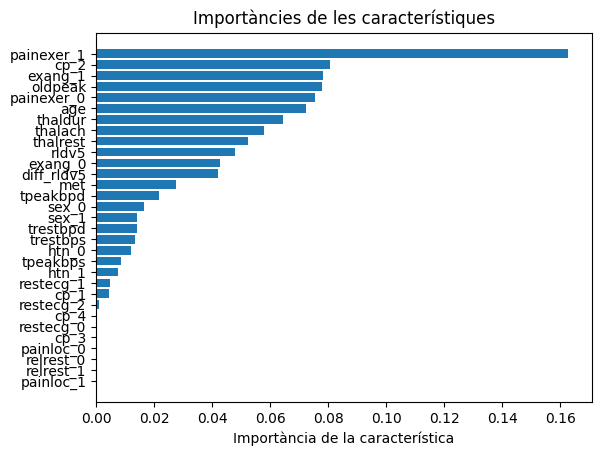

In [ ]:
plot_importances(gb)

In [ ]:
removed_cols = []
num_features = X_train.shape[1]

performance_df = pd.DataFrame(columns=['num_features', 'f2', 'f1', 'accuracy', 'precision', 'recall', 'removed_feature'])

model = GradientBoostingClassifier(random_state=1234)


X_copy = X_train.copy()


param_grid = {
    'loss': ["log_loss", "exponential"],
    #'n_estimators': [5],
    'n_estimators': [5, 25, 50, 75, 100],
    #'learning_rate': [1],
    'learning_rate': [0.05, 0.1, 0.15, 1, 2],
    'max_depth': [3, 4, 5]
}

least_important_feature = "ninguna"

# Iterar eliminando la característica menos importante hasta que queden la mitad
while num_features > 15:
    print("num features", num_features)
    gb, gb_params, crossval_results = validar_model(f"Gradient boosting {least_important_feature} removed", model, param_grid, X_copy, y_train, True)

    performance_df = pd.concat([performance_df, pd.DataFrame({
        'num_features': num_features,
        'f2': crossval_results[0],
        'accuracy': crossval_results[1],
        'f1': crossval_results[2],
        'precision': crossval_results[3],
        'recall': crossval_results[4],
        'removed_feature': [least_important_feature]
    })], ignore_index=True)

    importances = gb.feature_importances_
    least_important_idx = np.argmin(importances)
    least_important_feature = X_copy.columns[least_important_idx]
    print(least_important_feature)


    X_copy.drop(least_important_feature, axis=1, inplace=True)


    num_features -= 1



results_df

num features 31
painloc_0
num features 30
painloc_1
num features 29
relrest_0
num features 28
cp_1
num features 27
relrest_1
num features 26
trestbps
num features 25
cp_4
num features 24
met
num features 23
thalrest
num features 22
tpeakbps
num features 21
trestbpd
num features 20
rldv5
num features 19
diff_rldv5
num features 18
cp_2
num features 17
sex_0
num features 16
cp_3


F2  Accuracy        F1  Precision  \
Gradient boosting ninguna removed     0.885766  0.847189  0.873323   0.853721   
Gradient boosting painloc_0 removed   0.885907  0.830436  0.862550   0.827553   
Gradient boosting painloc_1 removed   0.886911  0.842398  0.870358   0.844589   
Gradient boosting relrest_0 removed   0.885177  0.828084  0.860890   0.824426   
Gradient boosting cp_1 removed        0.885433  0.837608  0.867163   0.839867   
Gradient boosting relrest_1 removed   0.885000  0.785141  0.834332   0.763203   
Gradient boosting trestbps removed    0.888813  0.839960  0.869339   0.839483   
Gradient boosting cp_4 removed        0.892782  0.794779  0.841605   0.769761   
Gradient boosting met removed         0.892782  0.794779  0.841605   0.769761   
Gradient boosting thalrest removed    0.893798  0.806741  0.848616   0.783688   
Gradient boosting tpeakbps removed    0.893512  0.797160  0.843207   0.772384   
Gradient boosting trestbpd removed    0.893798  0.806741  0.848616   0.783688   
Gradient boosting rldv5 removed       0.893512  0.797160  0.843207   0.772384   
Gradient boosting diff_rldv5 removed  0.893798  0.806741  0.848616   0.783688   
Gradient boosting cp_2 removed        0.893512  0.797160  0.843207   0.772384   
Gradient boosting sex_0 removed       0.893512  0.797160  0.843207   0.772384   

                                        Recall  
Gradient boosting ninguna removed     0.894367  
Gradient boosting painloc_0 removed   0.902612  
Gradient boosting painloc_1 removed   0.898449  
Gradient boosting relrest_0 removed   0.902531  
Gradient boosting cp_1 removed        0.898531  
Gradient boosting relrest_1 removed   0.923020  
Gradient boosting trestbps removed    0.902531  
Gradient boosting cp_4 removed        0.931184  
Gradient boosting met removed         0.931184  
Gradient boosting thalrest removed    0.927102  
Gradient boosting tpeakbps removed    0.931184  
Gradient boosting trestbpd removed    0.927102  
Gradient boosting rldv5 removed       0.931184  
Gradient boosting diff_rldv5 removed  0.927102  
Gradient boosting cp_2 removed        0.931184  
Gradient boosting sex_0 removed       0.931184

In [ ]:
performance_df

num_features        f2        f1  accuracy  precision    recall  \
0            31  0.885766  0.873323  0.847189   0.853721  0.894367   
1            30  0.885907  0.862550  0.830436   0.827553  0.902612   
2            29  0.886911  0.870358  0.842398   0.844589  0.898449   
3            28  0.885177  0.860890  0.828084   0.824426  0.902531   
4            27  0.885433  0.867163  0.837608   0.839867  0.898531   
5            26  0.885000  0.834332  0.785141   0.763203  0.923020   
6            25  0.888813  0.869339  0.839960   0.839483  0.902531   
7            24  0.892782  0.841605  0.794779   0.769761  0.931184   
8            23  0.892782  0.841605  0.794779   0.769761  0.931184   
9            22  0.893798  0.848616  0.806741   0.783688  0.927102   
10           21  0.893512  0.843207  0.797160   0.772384  0.931184   
11           20  0.893798  0.848616  0.806741   0.783688  0.927102   
12           19  0.893512  0.843207  0.797160   0.772384  0.931184   
13           18  0.893798  0.848616  0.806741   0.783688  0.927102   
14           17  0.893512  0.843207  0.797160   0.772384  0.931184   
15           16  0.893512  0.843207  0.797160   0.772384  0.931184   

   removed_feature  
0        painloc_0  
1        painloc_1  
2        relrest_0  
3             cp_1  
4        relrest_1  
5         trestbps  
6             cp_4  
7              met  
8         thalrest  
9         tpeakbps  
10        trestbpd  
11           rldv5  
12      diff_rldv5  
13            cp_2  
14           sex_0  
15            cp_3

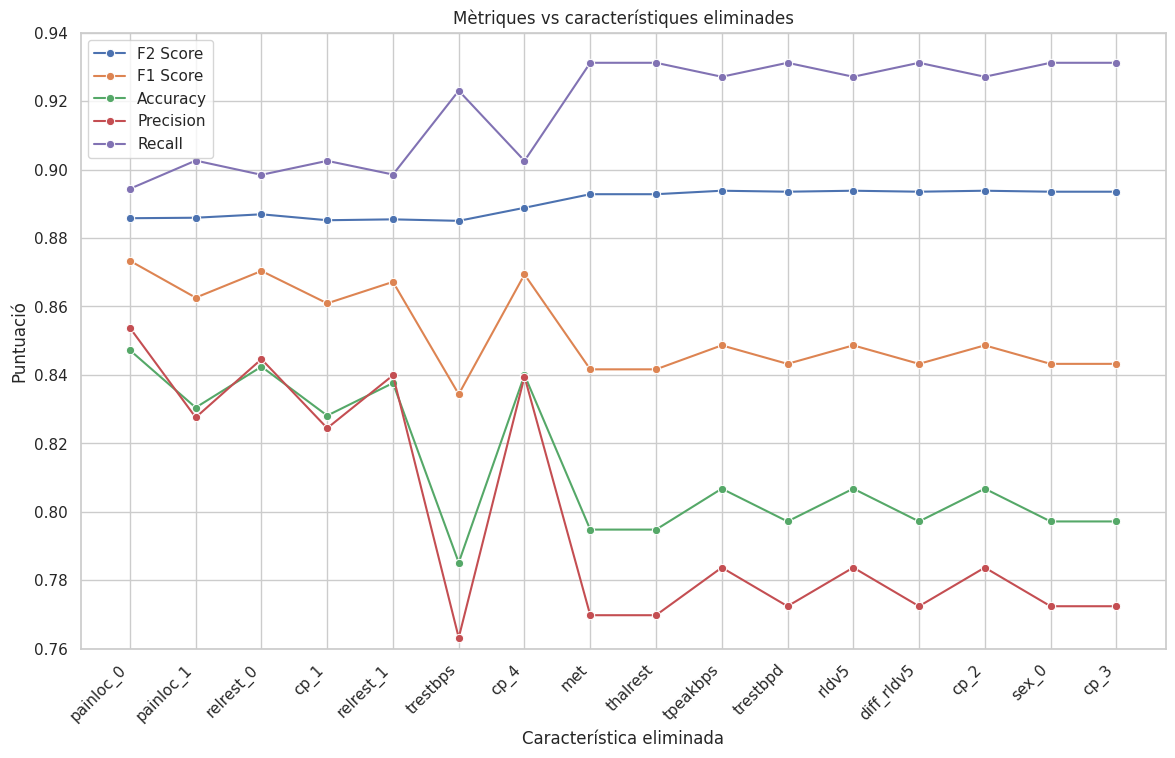

In [ ]:
sns.set(style="whitegrid")

# Crear una figura y ejes
plt.figure(figsize=(14, 8))

# Graficar las métricas
sns.lineplot(data=performance_df, x='removed_feature', y='f2', label='F2 Score', marker='o')
sns.lineplot(data=performance_df, x='removed_feature', y='f1', label='F1 Score', marker='o')
sns.lineplot(data=performance_df, x='removed_feature', y='accuracy', label='Accuracy', marker='o')
sns.lineplot(data=performance_df, x='removed_feature', y='precision', label='Precision', marker='o')
sns.lineplot(data=performance_df, x='removed_feature', y='recall', label='Recall', marker='o')
plt.xticks(rotation=45, ha='right')
# Ajustar los límites del eje y para ver las diferencias sutiles
plt.ylim(0.76, 0.94)

# Añadir títulos y etiquetas
plt.title('Mètriques vs característiques eliminades')
plt.xlabel('Característica eliminada')
plt.ylabel('Puntuació')
plt.legend()
plt.show()

# Elecció del model i estimació de l'error de generalització

In [ ]:
param_grid = {
    'loss': ["log_loss", "exponential"],
    'n_estimators': [1, 5, 25, 50, 75, 100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15, 1, 2],
    'max_depth': [3, 4, 5]
}

X_train_def = X_train.copy()
X_train_def.drop(["painloc_0","painloc_1","relrest_0","cp_1","relrest_1","trestbps"], axis = 1, inplace = True)
model = GradientBoostingClassifier(random_state=1234)
gb_def, gb_params_def, crossval_results_def = validar_model(f"Gradient boosting DEF", model, param_grid, X_train_def, y_train, True)
results_df

F2  Accuracy        F1  Precision    Recall
Gradient boosting DEF  0.888813   0.83996  0.869339   0.839483  0.902531

In [ ]:
X_test_def = X_test.copy()
X_test_def.drop(["painloc_0","painloc_1","relrest_0","cp_1","relrest_1","trestbps"], axis = 1, inplace = True)
y_pred = gb_def.predict(X_test_def)

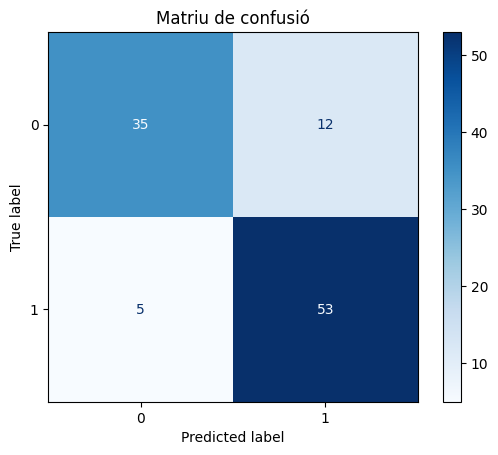

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)

plt.title('Matriu de confusió')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2, average='binary')
print(f'F2 Score: {f2:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precisió: {precision:.4f}')
print(f'Recall: {recall:.4f}')

F2 Score: 0.8923
Accuracy: 0.8381
F1 Score: 0.8618
Precision: 0.8154
Recall: 0.9138


In [ ]:
X_test.columns

y_test.iloc[X_test[X_test["sex_0"]==False].index]

499    1
583    1
21     0
421    0
355    1
      ..
480    1
308    0
194    0
509    1
606    0
Name: num, Length: 87, dtype: category
Categories (2, int64): [0, 1]

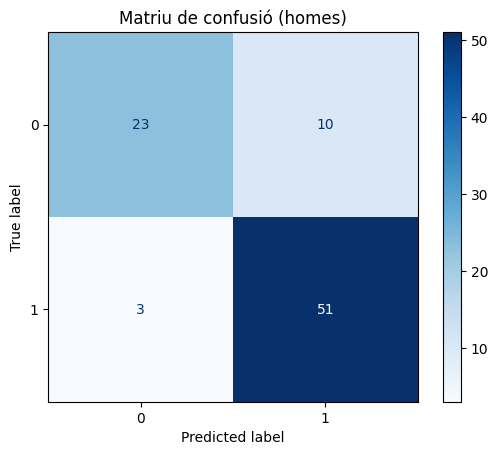

In [ ]:
conf_matrix = confusion_matrix(y_test.iloc[X_test[X_test["sex_0"]==False].index], y_pred[X_test[X_test["sex_0"]==False].index])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)

plt.title('Matriu de confusió (homes)')
plt.show()

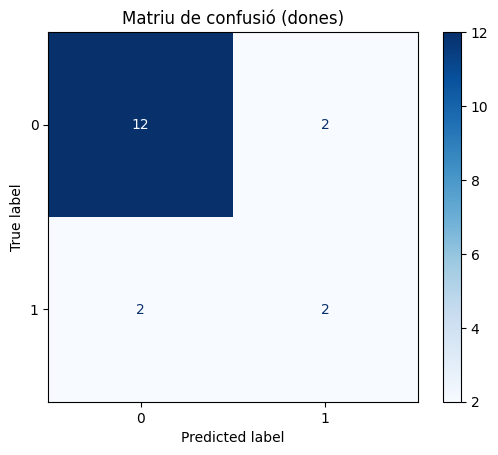

In [ ]:
conf_matrix = confusion_matrix(y_test.iloc[X_test[X_test["sex_0"]==True].index], y_pred[X_test[X_test["sex_0"]==True].index])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)

plt.title('Matriu de confusió (dones)')
plt.show()

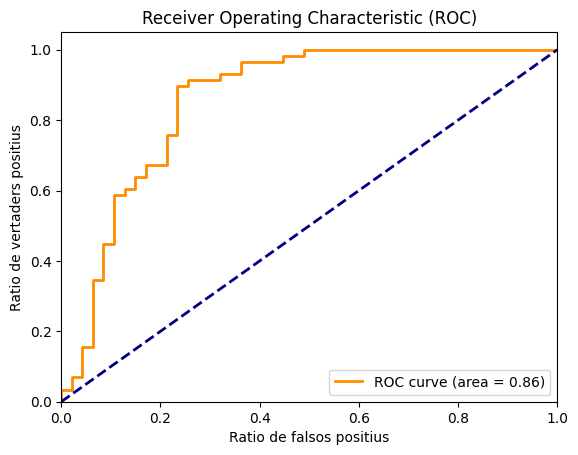

In [ ]:
from sklearn.metrics import roc_curve, auc
y_scores = gb_def.predict_proba(X_test_def)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcula el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de falsos positius')
plt.ylabel('Ratio de vertaders positius')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Complete attribute documentation:
      
      0 id: patient identification number
      1 ccf: social security number (I replaced this with a dummy value of 0)
      2 age: age in years
      3 sex: sex (1 = male; 0 = female)
      4 painloc: chest pain location (1 = substernal; 0 = otherwise)
      5 painexer (1 = provoked by exertion; 0 = otherwise)
      6 relrest (1 = relieved after rest; 0 = otherwise)
      7 pncaden (sum of 5, 6, and 7)
      8 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     9 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
     10 htn
     11 chol: serum cholestoral in mg/dl
     12 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
     13 cigs (cigarettes per day)
     14 years (number of years as a smoker)
     15 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     16 dm (1 = history of diabetes; 0 = no such history)
     17 famhist: family history of coronary artery disease (1 = yes; 0 = no)
     18 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
     19 ekgmo (month of exercise ECG reading)
     20 ekgday(day of exercise ECG reading)
     21 ekgyr (year of exercise ECG reading)
     22 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
     23 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
     24 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
     25 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
     26 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
     27 proto: exercise protocol
          1 = Bruce     
          2 = Kottus
          3 = McHenry
          4 = fast Balke
          5 = Balke
          6 = Noughton
          7 = bike 150 kpa min/min  (Not sure if "kpa min/min" is what was written!)
          8 = bike 125 kpa min/min  
          9 = bike 100 kpa min/min
         10 = bike 75 kpa min/min
         11 = bike 50 kpa min/min
         12 = arm ergometer
     28 thaldur: duration of exercise test in minutes
     29 thaltime: time when ST measure depression was noted
     30 met: mets achieved
     31 thalach: maximum heart rate achieved
     32 thalrest: resting heart rate
     33 tpeakbps: peak exercise blood pressure (first of 2 parts)
     34 tpeakbpd: peak exercise blood pressure (second of 2 parts)
     35 dummy
     36 trestbpd: resting blood pressure
     37 exang: exercise induced angina (1 = yes; 0 = no)
     38 xhypo: (1 = yes; 0 = no)
     39 oldpeak = ST depression induced by exercise relative to rest
     40 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     41 rldv5: height at rest
     42 rldv5e: height at peak exercise
     43 ca: number of major vessels (0-3) colored by flourosopy
     44 restckm: irrelevant
     45 exerckm: irrelevant
     46 restef: rest raidonuclid (sp?) ejection fraction
     47 restwm: rest wall (sp?) motion abnormality
        0 = none
        1 = mild or moderate
        2 = moderate or severe
        3 = akinesis or dyskmem (sp?)
     48 exeref: exercise radinalid (sp?) ejection fraction
     49 exerwm: exercise wall (sp?) motion
     50 thal: A blood disorder called thalassemia 3 = normal; 6 = fixed defect; 7 = reversable defect
     51 thalsev: not used
     52 thalpul: not used
     53 earlobe: not used
     54 cmo: month of cardiac cath (sp?)  (perhaps "call")
     55 cday: day of cardiac cath (sp?)
     56 cyr: year of cardiac cath (sp?)
     57 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
     58 lmt
     59 ladprox
     60 laddist
     61 diag
     62 cxmain
     63 ramus
     64 om1
     65 om2
     66 rcaprox
     67 rcadist
     68 lvx1: not used
     69 lvx2: not used
     70 lvx3: not used
     71 lvx4: not used
     72 lvf: not used
     73 cathef: not used
     74 junk: not used
     75 name: last name of patient